# Prediction of the Reamining Useful Life (RUL) of aircraft engine

The following code is used to predict the RUL of turbo fan engine. This is based on NASA's CMASPSS Data. 

Project team members: 

### Vijay Kothari (Project Leader)
### Dr. Debabrata Adhikari
### Dr.Keshava Kumar

- Course - Machine Learning and Artificial Intelligence with Python
- Centre for Continuing Education, Indian Institute of Science, Bangalore, INDIA



# Loading python libraries/machine learning models used in this code
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
---

First, we need to load the FD003 dataset into Python. We will be using pandas library for the same. We are also importing other python libraries which will be used in this project.

About the dataset: (Source: Readme.txt file from CMAPSSData)

- Data Set: FD003
- Train trjectories: 100
- Test trajectories: 100
- Conditions: ONE (Sea Level)
- Fault Modes: TWO (HPC Degradation, Fan Degradation)

In [2]:
# Load the training data into a pandas DataFrame

train_data = pd.read_csv('./train_FD003.txt', delimiter=' ', header=None)
#train_data.shape
train_data.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0005  0.0004  100.0  518.67  642.36  1583.23  1396.84  14.62   
1   1   2  0.0008 -0.0003  100.0  518.67  642.50  1584.69  1396.89  14.62   
2   1   3 -0.0014 -0.0002  100.0  518.67  642.18  1582.35  1405.61  14.62   
3   1   4 -0.0020  0.0001  100.0  518.67  642.92  1585.61  1392.27  14.62   
4   1   5  0.0016  0.0000  100.0  518.67  641.68  1588.63  1397.65  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8145.32  8.4246  0.03  391  2388  100.0  39.11  23.3537 NaN NaN  
1  ...  8152.85  8.4403  0.03  392  2388  100.0  38.99  23.4491 NaN NaN  
2  ...  8150.17  8.3901  0.03  391  2388  100.0  38.85  23.3669 NaN NaN  
3  ...  8146.56  8.3878  0.03  392  2388  100.0  38.96  23.2951 NaN NaN  
4  ...  8147.80  8.3869  0.03  392  2388  100.0  39.14  23.4583 NaN NaN  

[5 rows x 28 columns]

- from the above output we can see that the last two column 26 and 27 contains "NaN" which basically means it is a "not a number", is a numeric data type used to represent any value that is undefined or unpresentable. This column should be dropped.

# 2. Preprocessing: Data visualization, clean-up
---
Before we can start building a model, we need to preprocess the data. This involves removing unnecessary columns, dealing with missing values, and scaling the data.

- look at head and tail data
- look at the shape
- look at "Descriptive statistics" 

In [3]:
# Check for null values

null_values = train_data.isnull().sum()
print("Total number of NaN values in the FD004 data set is:",null_values)

Total number of NaN values in the FD004 data set is: 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    24720
27    24720
dtype: int64


In [4]:
#Preprocess the data - dropping column 26 and 27: Remove unnecessary columns

train_data.drop(train_data.columns[[26, 27]], axis=1, inplace=True)
train_data.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0005  0.0004  100.0  518.67  642.36  1583.23  1396.84  14.62   
1   1   2  0.0008 -0.0003  100.0  518.67  642.50  1584.69  1396.89  14.62   
2   1   3 -0.0014 -0.0002  100.0  518.67  642.18  1582.35  1405.61  14.62   
3   1   4 -0.0020  0.0001  100.0  518.67  642.92  1585.61  1392.27  14.62   
4   1   5  0.0016  0.0000  100.0  518.67  641.68  1588.63  1397.65  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  522.31  2388.01  8145.32  8.4246  0.03  391  2388  100.0  39.11   
1  ...  522.42  2388.03  8152.85  8.4403  0.03  392  2388  100.0  38.99   
2  ...  522.03  2388.00  8150.17  8.3901  0.03  391  2388  100.0  38.85   
3  ...  522.49  2388.08  8146.56  8.3878  0.03  392  2388  100.0  38.96   
4  ...  522.58  2388.03  8147.80  8.3869  0.03  392  2388  100.0  39.14   

        25  
0  23.3537  
1  23.4491  
2  23.3669  
3  23.2951  
4  23.4583  

[5 rows x 26 columns]

In [5]:
train_data.shape

(24720, 26)

In [6]:
train_data.describe()

0             1             2             3        4   \
count  24720.000000  24720.000000  24720.000000  24720.000000  24720.0   
mean      48.631877    139.077063     -0.000024      0.000005    100.0   
std       29.348985     98.846675      0.002194      0.000294      0.0   
min        1.000000      1.000000     -0.008600     -0.000600    100.0   
25%       23.000000     62.000000     -0.001500     -0.000200    100.0   
50%       47.000000    124.000000      0.000000     -0.000000    100.0   
75%       74.000000    191.000000      0.001500      0.000300    100.0   
max      100.000000    525.000000      0.008600      0.000700    100.0   

                 5             6             7             8             9   \
count  2.472000e+04  24720.000000  24720.000000  24720.000000  2.472000e+04   
mean   5.186700e+02    642.457858   1588.079175   1404.471212  1.462000e+01   
std    6.684921e-11      0.523031      6.810418      9.773178  3.602525e-12   
min    5.186700e+02    640.840000   1564.300000   1377.060000  1.462000e+01   
25%    5.186700e+02    642.080000   1583.280000   1397.187500  1.462000e+01   
50%    5.186700e+02    642.400000   1587.520000   1402.910000  1.462000e+01   
75%    5.186700e+02    642.790000   1592.412500   1410.600000  1.462000e+01   
max    5.186700e+02    645.110000   1615.390000   1441.160000  1.462000e+01   

       ...            15            16            17            18  \
count  ...  24720.000000  24720.000000  24720.000000  24720.000000   
mean   ...     47.415707    523.050873   2388.071643   8144.202916   
std    ...      0.300074      3.255314      0.158121     16.504118   
min    ...     46.690000    517.770000   2386.930000   8099.680000   
25%    ...     47.190000    521.150000   2388.010000   8134.510000   
50%    ...     47.360000    521.980000   2388.070000   8141.200000   
75%    ...     47.600000    523.840000   2388.140000   8149.230000   
max    ...     48.440000    537.400000   2388.610000   8290.550000   

                 19            21       22       23            24  \
count  24720.000000  24720.000000  24720.0  24720.0  24720.000000   
mean       8.396176    392.566545   2388.0    100.0     38.988552   
std        0.060512      1.761459      0.0      0.0      0.248865   
min        8.156300    388.000000   2388.0    100.0     38.170000   
25%        8.360600    391.000000   2388.0    100.0     38.830000   
50%        8.398300    392.000000   2388.0    100.0     38.990000   
75%        8.437000    394.000000   2388.0    100.0     39.140000   
max        8.570500    399.000000   2388.0    100.0     39.850000   

                 25  
count  24720.000000  
mean      23.393024  
std        0.149234  
min       22.872600  
25%       23.296200  
50%       23.391600  
75%       23.483300  
max       23.950500  

[8 rows x 25 columns]

In [7]:
print(train_data.dtypes)
# check if there are any columns with data type `object`
print(train_data.select_dtypes(include=['object']).columns)

0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20     object
21      int64
22      int64
23    float64
24    float64
25    float64
dtype: object
Int64Index([20], dtype='int64')


In [8]:
train_data[20].dtype

unique_values = train_data[20].unique()
for value in unique_values:
    if not isinstance(value, (int, float)):
        print(f"{value} is not a number")


0.03 is not a number
0z̄.03 is not a number


In [9]:
print(train_data[20].unique())

['0.03' '0z̄.03']


In [10]:
# replace non-numeric values with NaN
train_data[20] = pd.to_numeric(train_data[20], errors='coerce')

# convert to float
train_data[20] = train_data[20].astype(float)

unique_value = train_data[20].unique()[0]
train_data[20] = train_data[20].fillna(unique_value)
print(train_data[20].dtype)
print(train_data[20].unique())

float64
[0.03]


In [11]:
# Rename the remaining columns
index_names=['engineID','cycles']
column_names = ['operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
               [f'sensor_{i}' for i in range(1, 22)]

train_data.columns=index_names + column_names

#Calculating the RUL based on the available data in the data set
train_data['RUL'] = train_data.groupby('engineID')['cycles'].transform(max) - train_data['cycles']

In [12]:
#visualizing the training data set after previous addition of columns and RUL calculation
train_data

engineID  cycles  operational_setting_1  operational_setting_2  \
0             1       1                -0.0005                 0.0004   
1             1       2                 0.0008                -0.0003   
2             1       3                -0.0014                -0.0002   
3             1       4                -0.0020                 0.0001   
4             1       5                 0.0016                 0.0000   
...         ...     ...                    ...                    ...   
24715       100     148                -0.0016                -0.0003   
24716       100     149                 0.0034                -0.0003   
24717       100     150                -0.0016                 0.0004   
24718       100     151                -0.0023                 0.0004   
24719       100     152                 0.0000                 0.0003   

       operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  \
0                      100.0    518.67    642.36   1583.23   1396.84   
1                      100.0    518.67    642.50   1584.69   1396.89   
2                      100.0    518.67    642.18   1582.35   1405.61   
3                      100.0    518.67    642.92   1585.61   1392.27   
4                      100.0    518.67    641.68   1588.63   1397.65   
...                      ...       ...       ...       ...       ...   
24715                  100.0    518.67    643.78   1596.01   1424.11   
24716                  100.0    518.67    643.29   1596.38   1429.14   
24717                  100.0    518.67    643.84   1604.53   1431.41   
24718                  100.0    518.67    643.94   1597.56   1426.57   
24719                  100.0    518.67    643.64   1599.04   1436.06   

       sensor_5  ...  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  \
0         14.62  ...    2388.01    8145.32     8.4246       0.03        391   
1         14.62  ...    2388.03    8152.85     8.4403       0.03        392   
2         14.62  ...    2388.00    8150.17     8.3901       0.03        391   
3         14.62  ...    2388.08    8146.56     8.3878       0.03        392   
4         14.62  ...    2388.03    8147.80     8.3869       0.03        392   
...         ...  ...        ...        ...        ...        ...        ...   
24715     14.62  ...    2388.30    8138.08     8.5036       0.03        394   
24716     14.62  ...    2388.28    8144.36     8.5174       0.03        395   
24717     14.62  ...    2388.24    8135.95     8.5223       0.03        396   
24718     14.62  ...    2388.26    8141.24     8.5148       0.03        395   
24719     14.62  ...    2388.24    8136.98     8.5150       0.03        396   

       sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0           2388      100.0      39.11    23.3537  258  
1           2388      100.0      38.99    23.4491  257  
2           2388      100.0      38.85    23.3669  256  
3           2388      100.0      38.96    23.2951  255  
4           2388      100.0      39.14    23.4583  254  
...          ...        ...        ...        ...  ...  
24715       2388      100.0      38.44    22.9631    4  
24716       2388      100.0      38.50    22.9746    3  
24717       2388      100.0      38.39    23.0682    2  
24718       2388      100.0      38.31    23.0753    1  
24719       2388      100.0      38.56    23.0847    0  

[24720 rows x 27 columns]

In [13]:
train_data.loc[:,['engineID','cycles']].describe()

engineID        cycles
count  24720.000000  24720.000000
mean      48.631877    139.077063
std       29.348985     98.846675
min        1.000000      1.000000
25%       23.000000     62.000000
50%       47.000000    124.000000
75%       74.000000    191.000000
max      100.000000    525.000000

Following points can be summarized from the above table
- There are total 24720 rows and 27 columns
- The unit numbers start at 1 and end at 100 as expected.
- The mean and quantiles don’t align neatly with the descriptive statistics of a vector from 1–100 as each unit has a different maximum cycles and thus a different number of rows.

In [14]:
#train_data.loc[:,['engineID', 'cycles']].describe()
train_data.loc[:,'sensor_1':].describe().transpose()

count         mean           std        min        25%  \
sensor_1   24720.0   518.670000  6.684921e-11   518.6700   518.6700   
sensor_2   24720.0   642.457858  5.230311e-01   640.8400   642.0800   
sensor_3   24720.0  1588.079175  6.810418e+00  1564.3000  1583.2800   
sensor_4   24720.0  1404.471212  9.773178e+00  1377.0600  1397.1875   
sensor_5   24720.0    14.620000  3.602525e-12    14.6200    14.6200   
sensor_6   24720.0    21.595841  1.811600e-02    21.4500    21.5800   
sensor_7   24720.0   555.143808  3.437343e+00   549.6100   553.1100   
sensor_8   24720.0  2388.071555  1.582849e-01  2386.9000  2388.0000   
sensor_9   24720.0  9064.110809  1.998029e+01  9017.9800  9051.9200   
sensor_10  24720.0     1.301232  3.484849e-03     1.2900     1.3000   
sensor_11  24720.0    47.415707  3.000742e-01    46.6900    47.1900   
sensor_12  24720.0   523.050873  3.255314e+00   517.7700   521.1500   
sensor_13  24720.0  2388.071643  1.581207e-01  2386.9300  2388.0100   
sensor_14  24720.0  8144.202916  1.650412e+01  8099.6800  8134.5100   
sensor_15  24720.0     8.396176  6.051161e-02     8.1563     8.3606   
sensor_16  24720.0     0.030000  1.750371e-14     0.0300     0.0300   
sensor_17  24720.0   392.566545  1.761459e+00   388.0000   391.0000   
sensor_18  24720.0  2388.000000  0.000000e+00  2388.0000  2388.0000   
sensor_19  24720.0   100.000000  0.000000e+00   100.0000   100.0000   
sensor_20  24720.0    38.988552  2.488647e-01    38.1700    38.8300   
sensor_21  24720.0    23.393024  1.492338e-01    22.8726    23.2962   
RUL        24720.0   138.077063  9.884668e+01     0.0000    61.0000   

                 50%        75%        max  
sensor_1    518.6700   518.6700   518.6700  
sensor_2    642.4000   642.7900   645.1100  
sensor_3   1587.5200  1592.4125  1615.3900  
sensor_4   1402.9100  1410.6000  1441.1600  
sensor_5     14.6200    14.6200    14.6200  
sensor_6     21.6000    21.6100    21.6100  
sensor_7    554.0500   556.0400   570.4900  
sensor_8   2388.0700  2388.1400  2388.6000  
sensor_9   9060.0100  9070.0925  9234.3500  
sensor_10     1.3000     1.3000     1.3200  
sensor_11    47.3600    47.6000    48.4400  
sensor_12   521.9800   523.8400   537.4000  
sensor_13  2388.0700  2388.1400  2388.6100  
sensor_14  8141.2000  8149.2300  8290.5500  
sensor_15     8.3983     8.4370     8.5705  
sensor_16     0.0300     0.0300     0.0300  
sensor_17   392.0000   394.0000   399.0000  
sensor_18  2388.0000  2388.0000  2388.0000  
sensor_19   100.0000   100.0000   100.0000  
sensor_20    38.9900    39.1400    39.8500  
sensor_21    23.3916    23.4833    23.9505  
RUL         123.0000   190.0000   524.0000

In [15]:
train_data.apply(pd.to_numeric, errors='coerce')

engineID  cycles  operational_setting_1  operational_setting_2  \
0             1       1                -0.0005                 0.0004   
1             1       2                 0.0008                -0.0003   
2             1       3                -0.0014                -0.0002   
3             1       4                -0.0020                 0.0001   
4             1       5                 0.0016                 0.0000   
...         ...     ...                    ...                    ...   
24715       100     148                -0.0016                -0.0003   
24716       100     149                 0.0034                -0.0003   
24717       100     150                -0.0016                 0.0004   
24718       100     151                -0.0023                 0.0004   
24719       100     152                 0.0000                 0.0003   

       operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  \
0                      100.0    518.67    642.36   1583.23   1396.84   
1                      100.0    518.67    642.50   1584.69   1396.89   
2                      100.0    518.67    642.18   1582.35   1405.61   
3                      100.0    518.67    642.92   1585.61   1392.27   
4                      100.0    518.67    641.68   1588.63   1397.65   
...                      ...       ...       ...       ...       ...   
24715                  100.0    518.67    643.78   1596.01   1424.11   
24716                  100.0    518.67    643.29   1596.38   1429.14   
24717                  100.0    518.67    643.84   1604.53   1431.41   
24718                  100.0    518.67    643.94   1597.56   1426.57   
24719                  100.0    518.67    643.64   1599.04   1436.06   

       sensor_5  ...  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  \
0         14.62  ...    2388.01    8145.32     8.4246       0.03        391   
1         14.62  ...    2388.03    8152.85     8.4403       0.03        392   
2         14.62  ...    2388.00    8150.17     8.3901       0.03        391   
3         14.62  ...    2388.08    8146.56     8.3878       0.03        392   
4         14.62  ...    2388.03    8147.80     8.3869       0.03        392   
...         ...  ...        ...        ...        ...        ...        ...   
24715     14.62  ...    2388.30    8138.08     8.5036       0.03        394   
24716     14.62  ...    2388.28    8144.36     8.5174       0.03        395   
24717     14.62  ...    2388.24    8135.95     8.5223       0.03        396   
24718     14.62  ...    2388.26    8141.24     8.5148       0.03        395   
24719     14.62  ...    2388.24    8136.98     8.5150       0.03        396   

       sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0           2388      100.0      39.11    23.3537  258  
1           2388      100.0      38.99    23.4491  257  
2           2388      100.0      38.85    23.3669  256  
3           2388      100.0      38.96    23.2951  255  
4           2388      100.0      39.14    23.4583  254  
...          ...        ...        ...        ...  ...  
24715       2388      100.0      38.44    22.9631    4  
24716       2388      100.0      38.50    22.9746    3  
24717       2388      100.0      38.39    23.0682    2  
24718       2388      100.0      38.31    23.0753    1  
24719       2388      100.0      38.56    23.0847    0  

[24720 rows x 27 columns]

### Max time cycle found for each engine

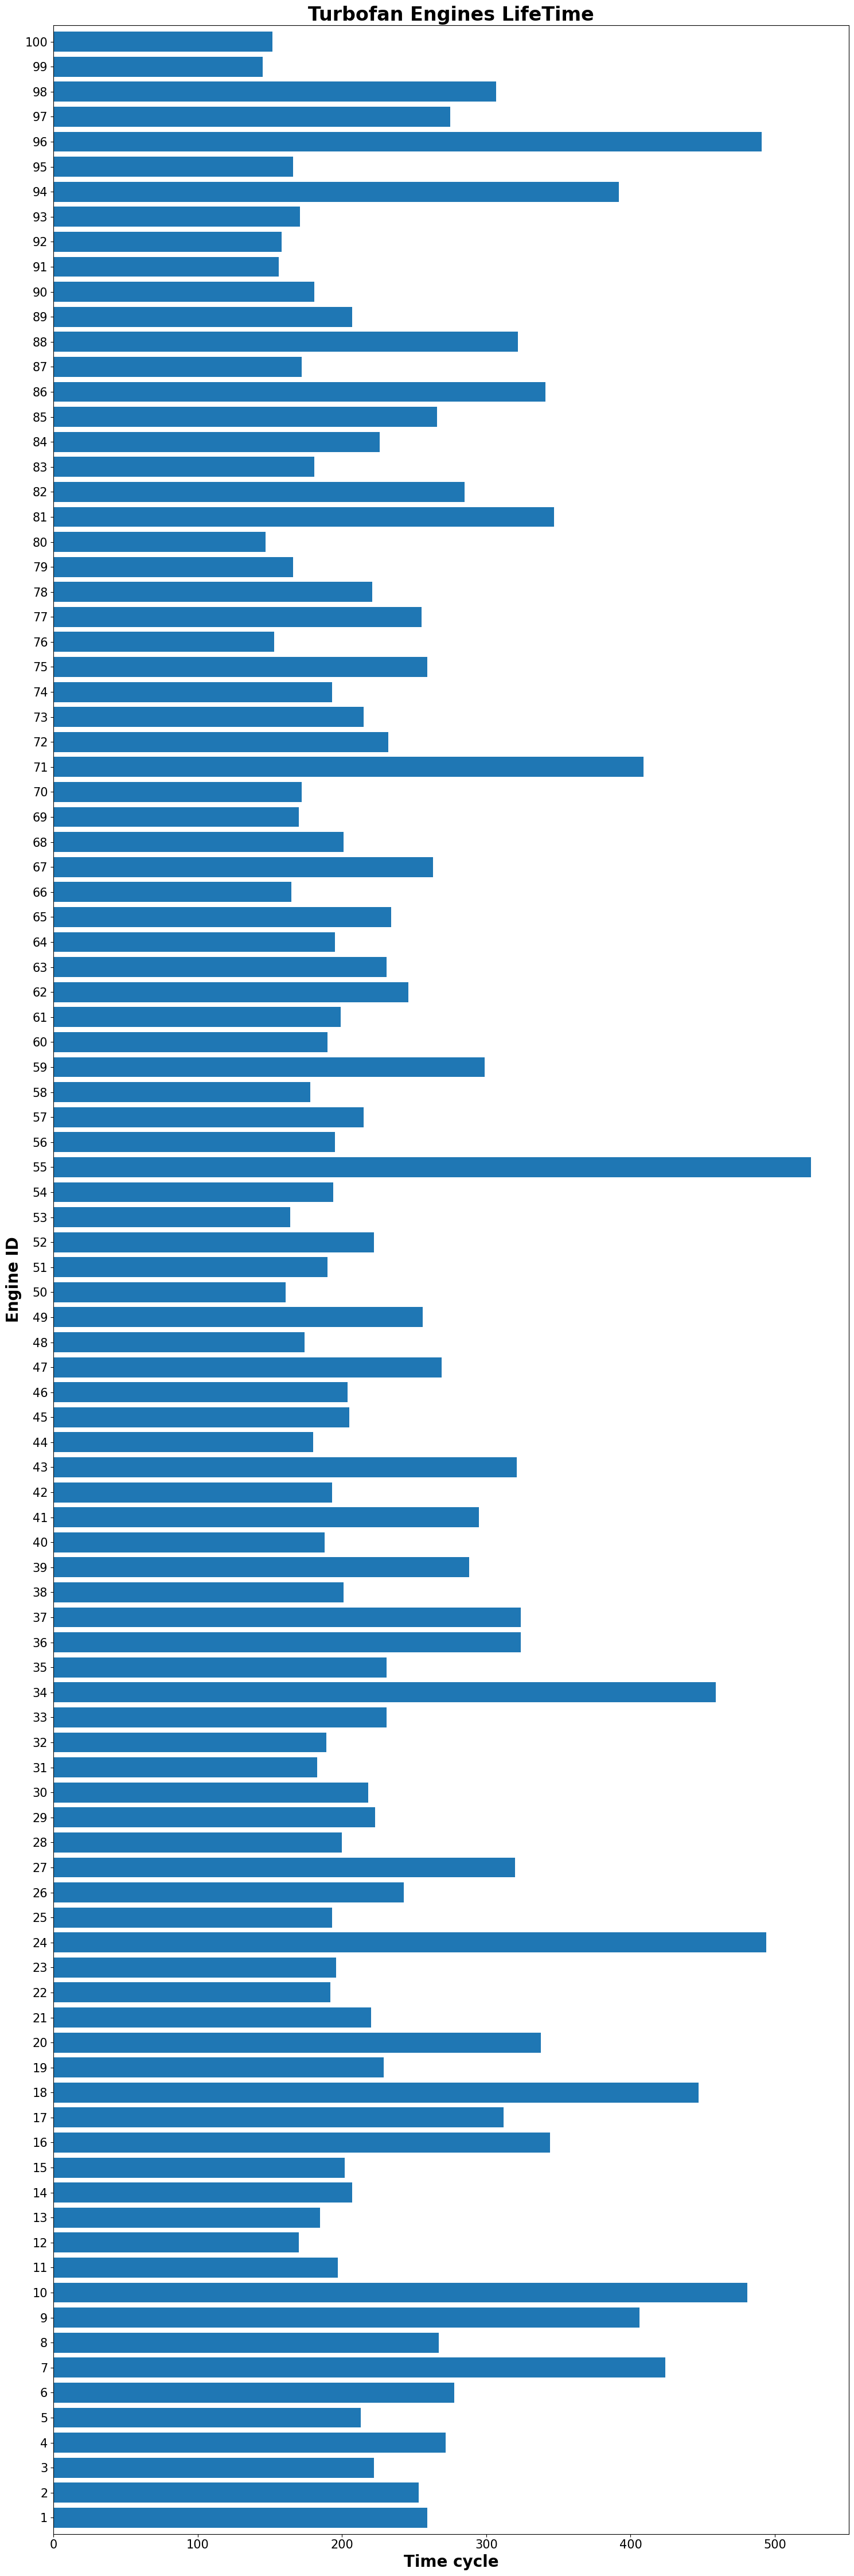

In [16]:
max_cycles=train_data[index_names].groupby('engineID').max()
plt.figure(figsize=(15,45))
ax=max_cycles['cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=24)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('Engine ID',fontweight='bold',size=20)
plt.yticks(size=15)
plt.tight_layout()
plt.show()

In [17]:
train_data.groupby('engineID')['cycles'].max()

engineID
1      259
2      253
3      222
4      272
5      213
      ... 
96     491
97     275
98     307
99     145
100    152
Name: cycles, Length: 100, dtype: int64

In [18]:
# Maximize feature data feame and reset index with engine ID
max_features = train_data.groupby('engineID').max().reset_index()
max_features

engineID  cycles  operational_setting_1  operational_setting_2  \
0          1     259                 0.0068                 0.0005   
1          2     253                 0.0058                 0.0005   
2          3     222                 0.0068                 0.0006   
3          4     272                 0.0059                 0.0005   
4          5     213                 0.0051                 0.0005   
..       ...     ...                    ...                    ...   
95        96     491                 0.0068                 0.0005   
96        97     275                 0.0055                 0.0005   
97        98     307                 0.0070                 0.0005   
98        99     145                 0.0055                 0.0005   
99       100     152                 0.0065                 0.0004   

    operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                   100.0    518.67    644.02   1606.80   1434.33     14.62   
1                   100.0    518.67    643.63   1607.18   1431.57     14.62   
2                   100.0    518.67    644.23   1606.01   1432.49     14.62   
3                   100.0    518.67    644.47   1606.59   1434.11     14.62   
4                   100.0    518.67    644.45   1608.57   1439.48     14.62   
..                    ...       ...       ...       ...       ...       ...   
95                  100.0    518.67    643.68   1606.06   1428.64     14.62   
96                  100.0    518.67    643.63   1612.52   1427.18     14.62   
97                  100.0    518.67    643.67   1606.17   1426.92     14.62   
98                  100.0    518.67    644.15   1607.46   1430.93     14.62   
99                  100.0    518.67    644.19   1607.83   1436.06     14.62   

    ...  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  \
0   ...    2388.28    8157.42     8.5480       0.03        398       2388   
1   ...    2388.57    8190.81     8.4290       0.03        397       2388   
2   ...    2388.28    8164.52     8.5492       0.03        398       2388   
3   ...    2388.34    8137.71     8.5699       0.03        397       2388   
4   ...    2388.27    8183.86     8.5418       0.03        398       2388   
..  ...        ...        ...        ...        ...        ...        ...   
95  ...    2388.53    8195.58     8.4366       0.03        397       2388   
96  ...    2388.54    8199.20     8.4400       0.03        399       2388   
97  ...    2388.55    8196.29     8.4281       0.03        398       2388   
98  ...    2388.28    8150.85     8.5522       0.03        397       2388   
99  ...    2388.30    8144.36     8.5379       0.03        397       2388   

    sensor_19  sensor_20  sensor_21  RUL  
0       100.0      39.20    23.5448  258  
1       100.0      39.76    23.9159  252  
2       100.0      39.22    23.5158  221  
3       100.0      39.08    23.4041  271  
4       100.0      39.10    23.4300  212  
..        ...        ...        ...  ...  
95      100.0      39.80    23.8153  490  
96      100.0      39.70    23.8974  274  
97      100.0      39.67    23.8179  306  
98      100.0      38.97    23.3825  144  
99      100.0      39.10    23.4424  151  

[100 rows x 27 columns]

In [19]:
max_features.max()

engineID                  100.0000
cycles                    525.0000
operational_setting_1       0.0086
operational_setting_2       0.0007
operational_setting_3     100.0000
sensor_1                  518.6700
sensor_2                  645.1100
sensor_3                 1615.3900
sensor_4                 1441.1600
sensor_5                   14.6200
sensor_6                   21.6100
sensor_7                  570.4900
sensor_8                 2388.6000
sensor_9                 9234.3500
sensor_10                   1.3200
sensor_11                  48.4400
sensor_12                 537.4000
sensor_13                2388.6100
sensor_14                8290.5500
sensor_15                   8.5705
sensor_16                   0.0300
sensor_17                 399.0000
sensor_18                2388.0000
sensor_19                 100.0000
sensor_20                  39.8500
sensor_21                  23.9505
RUL                       524.0000
dtype: float64

In [20]:
train_data[['engineID','RUL']]

engineID  RUL
0             1  258
1             1  257
2             1  256
3             1  255
4             1  254
...         ...  ...
24715       100    4
24716       100    3
24717       100    2
24718       100    1
24719       100    0

[24720 rows x 2 columns]

In [21]:
# Compute the correlation matrix
corr = train_data.corr()
corr_col = corr['RUL'].drop('RUL')
corr_col_sorted = corr_col.sort_values(ascending=False)
print(pd.DataFrame({'Feature': corr_col_sorted.index, 'Correlation with RUL': corr_col_sorted.values}))

                  Feature  Correlation with RUL
0               sensor_20              0.037782
1               sensor_21              0.033465
2   operational_setting_1              0.003700
3   operational_setting_2             -0.001204
4               sensor_15             -0.016501
5                engineID             -0.077196
6                sensor_6             -0.215352
7                sensor_7             -0.315048
8               sensor_12             -0.329452
9               sensor_10             -0.363432
10              sensor_14             -0.481807
11                 cycles             -0.482744
12               sensor_9             -0.551843
13               sensor_2             -0.590564
14               sensor_3             -0.624236
15              sensor_17             -0.649220
16               sensor_8             -0.655345
17              sensor_13             -0.656340
18               sensor_4             -0.657224
19              sensor_11             -0

# Plotting the evolution of features along with the evolution with RUL

Now we examine the features signals to understand the distinction between "good" and "bad" features (i.e., features that contain meaningful information versus those that do not). We utilize a plotting function to generate visual representations of the feature signals for every 10th turbofan, aiding in the determination of their quality.

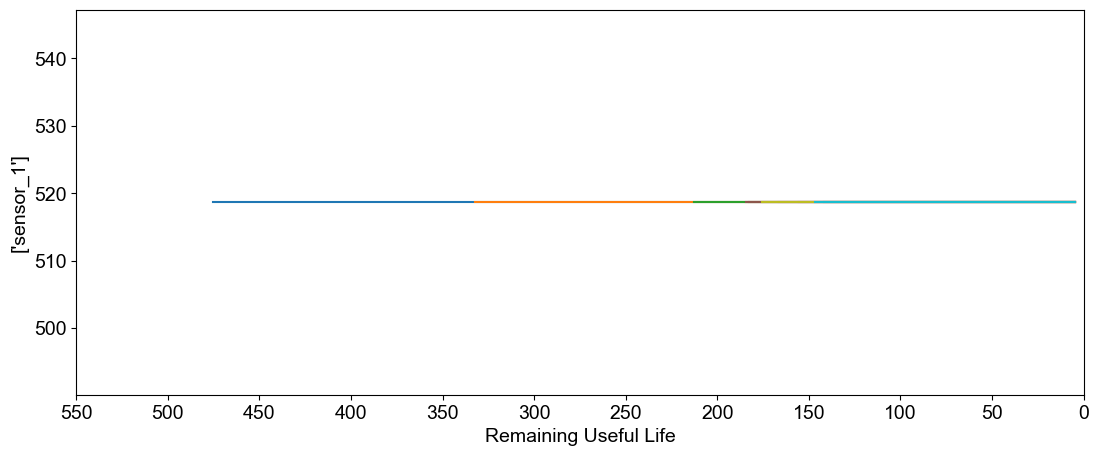

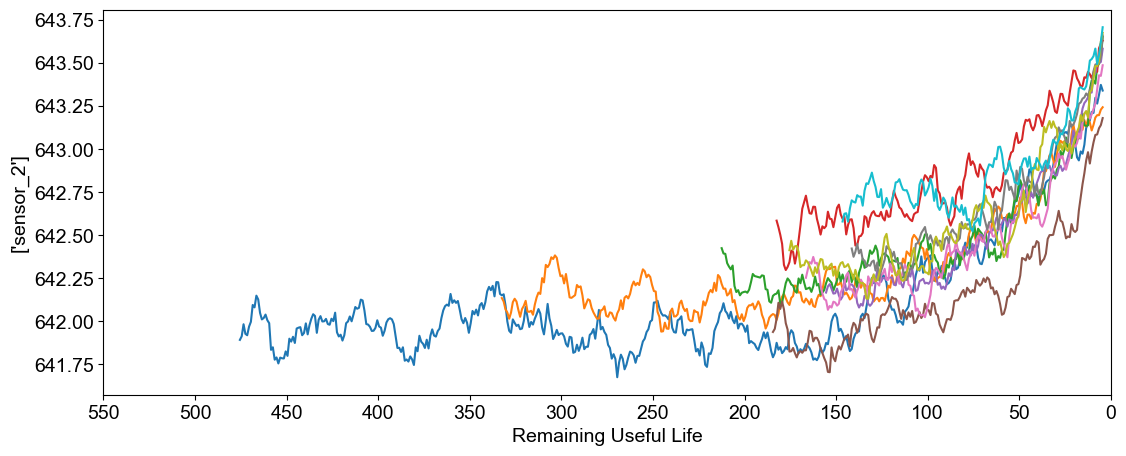

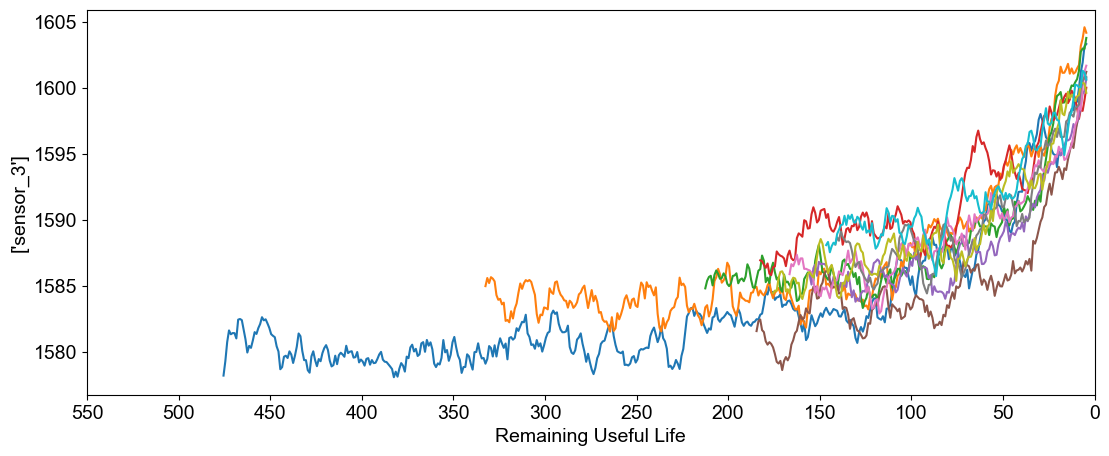

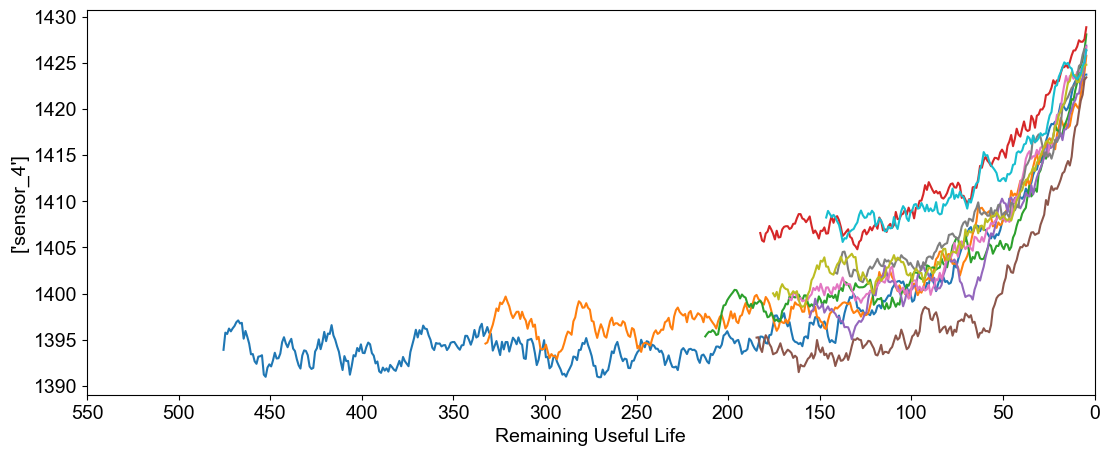

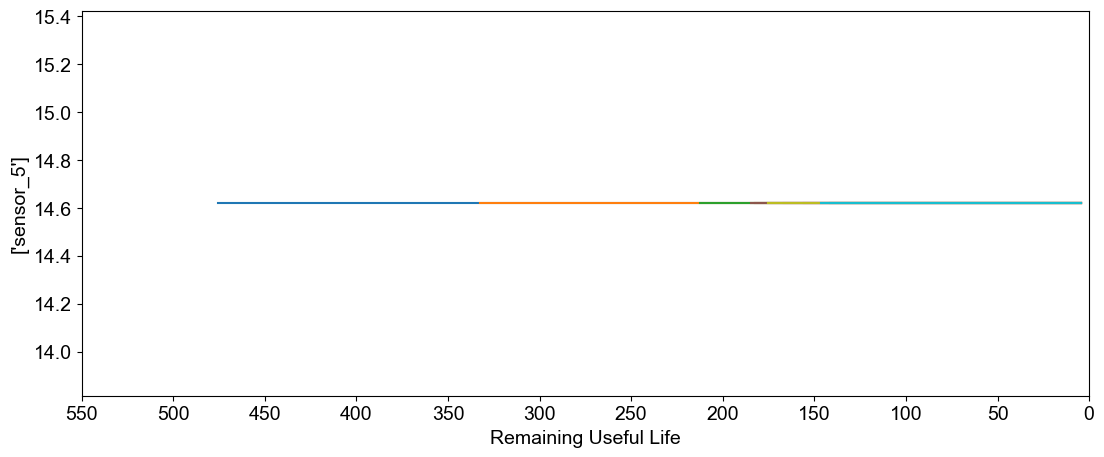

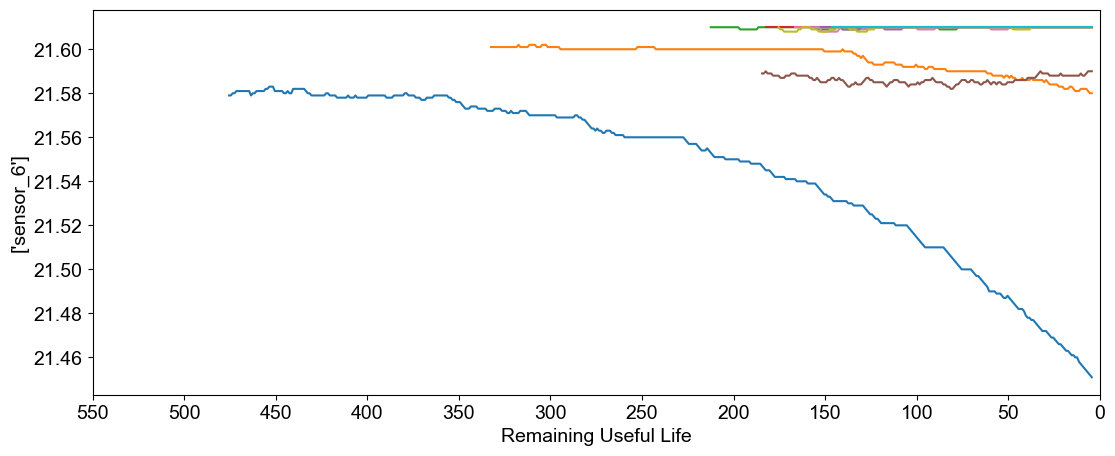

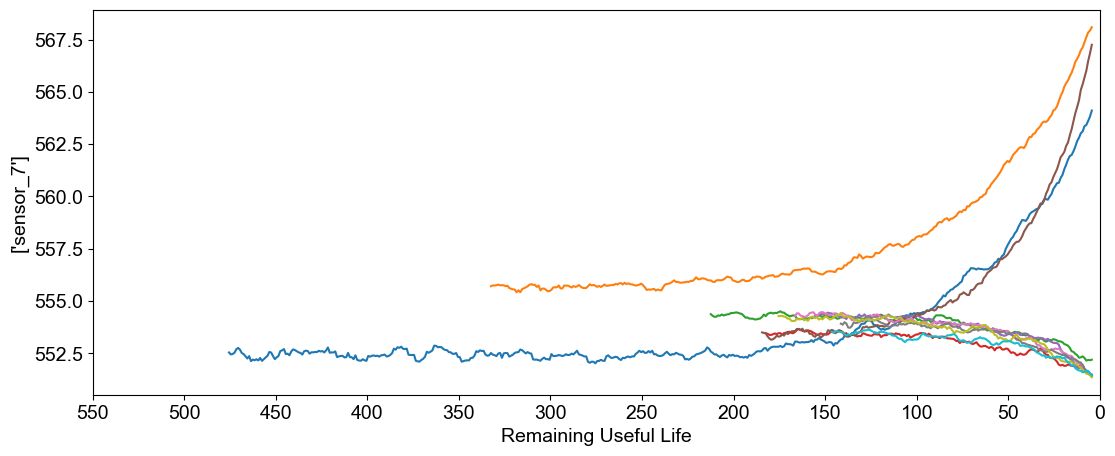

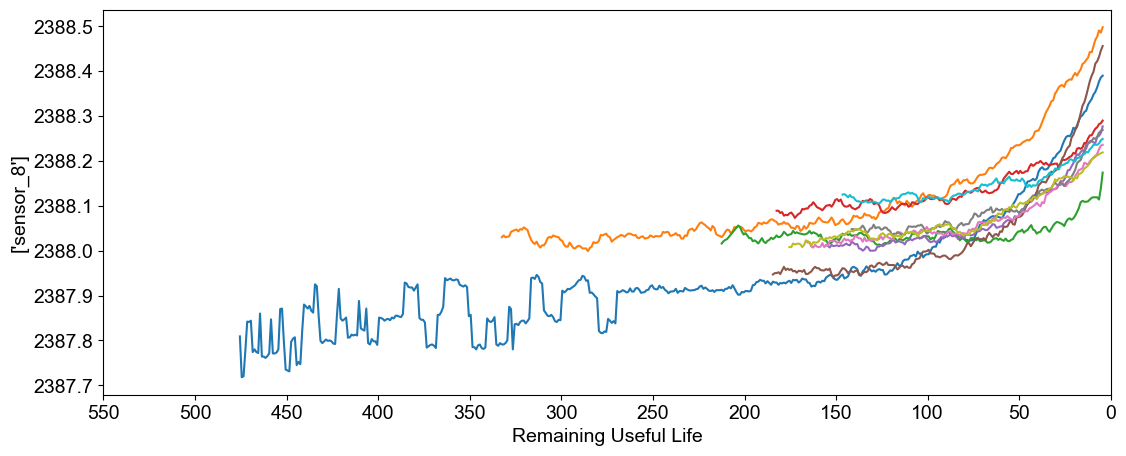

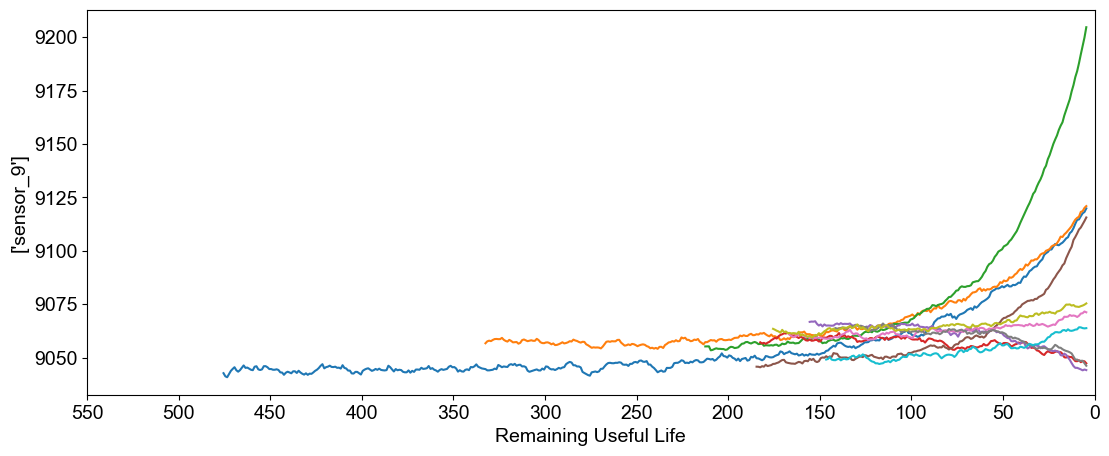

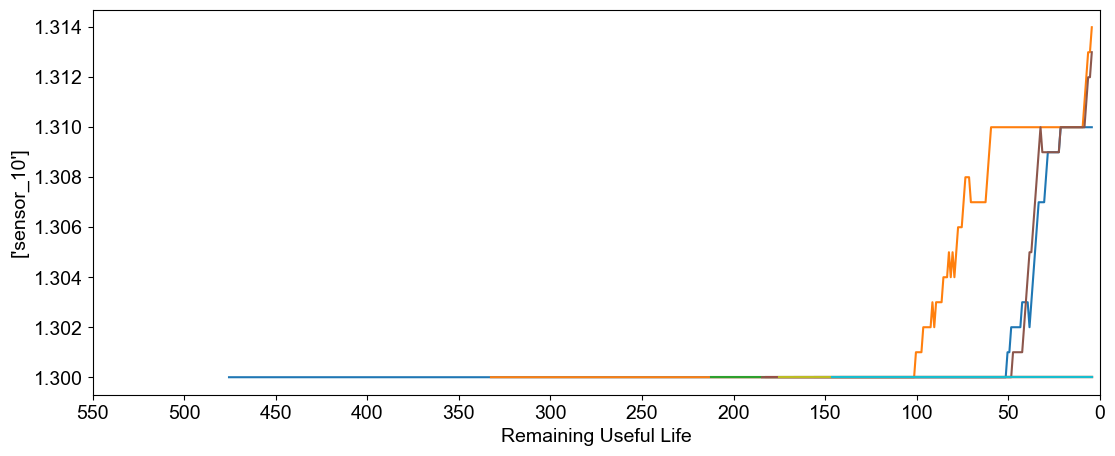

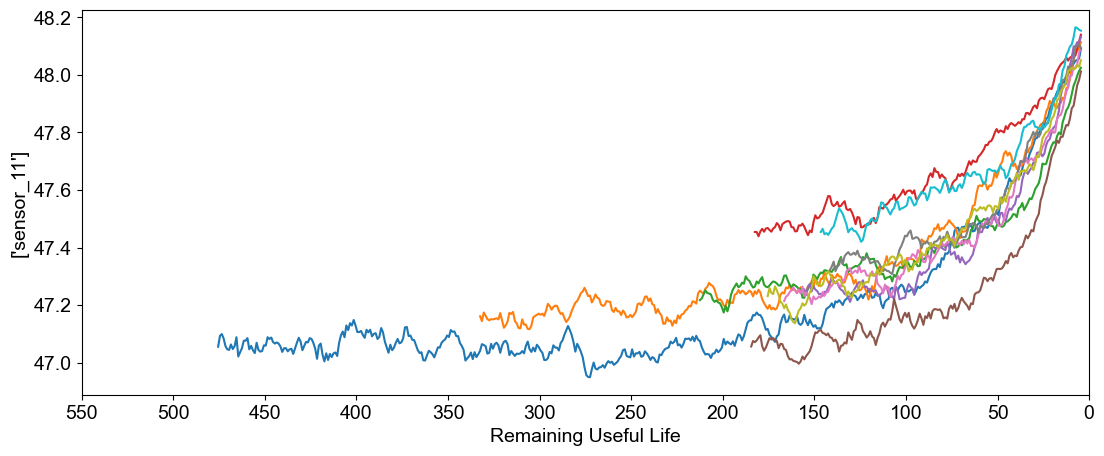

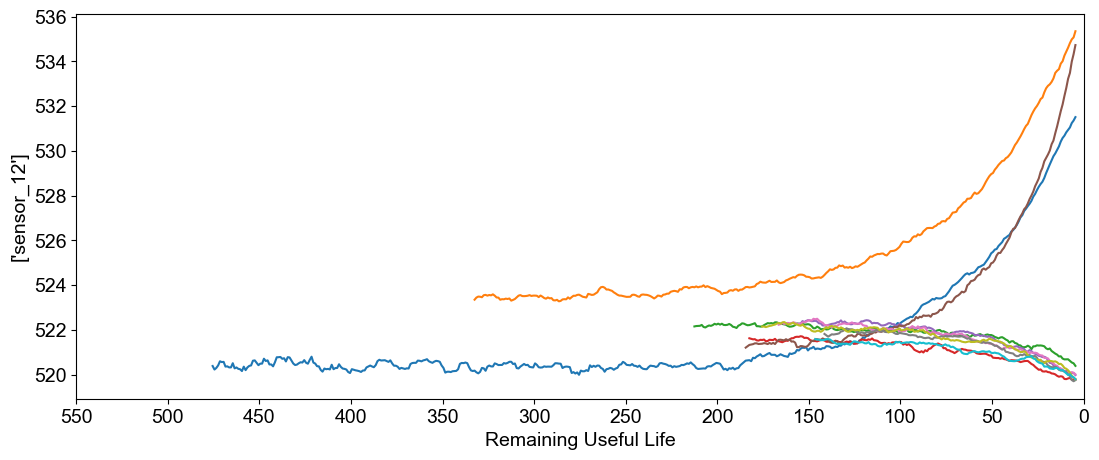

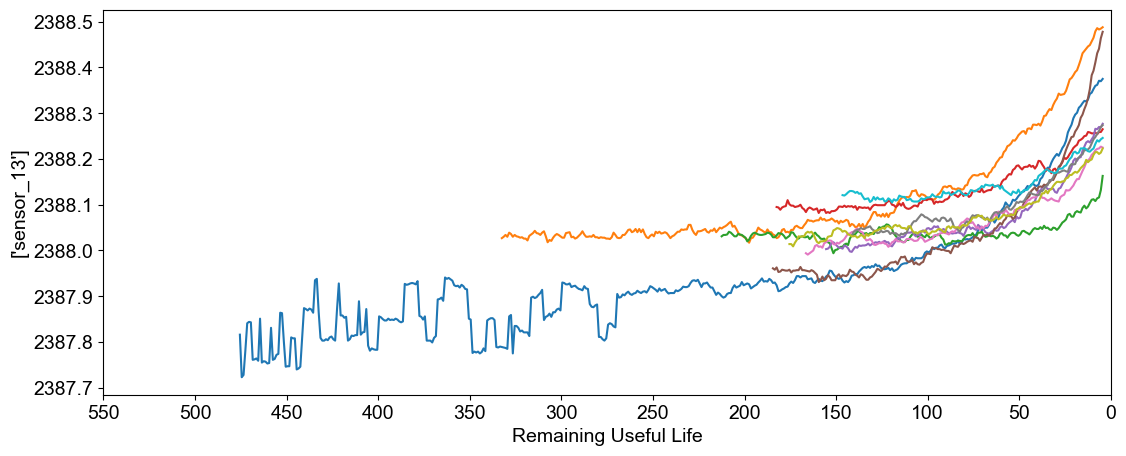

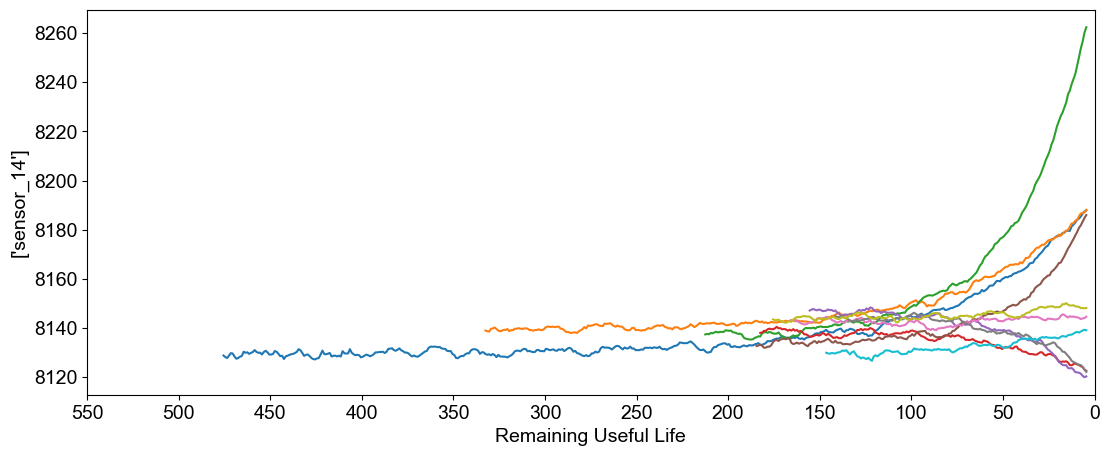

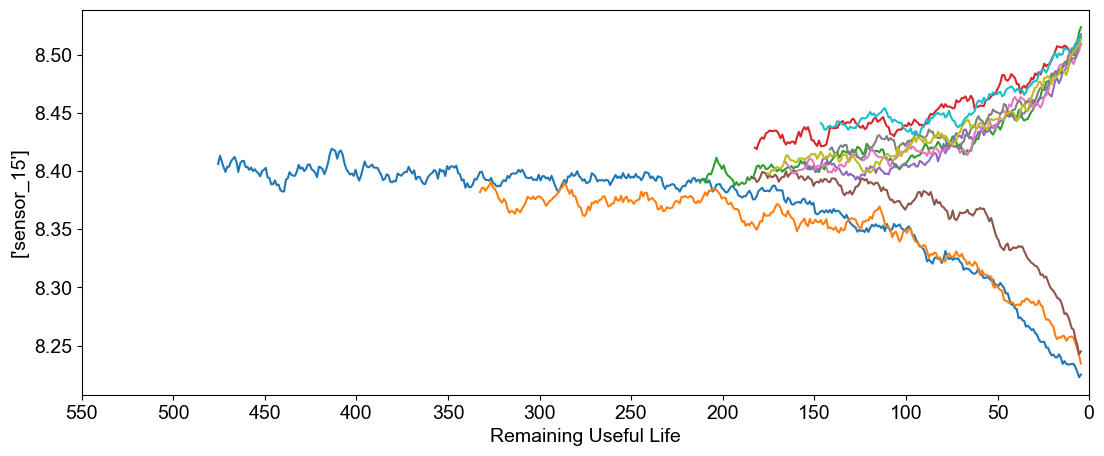

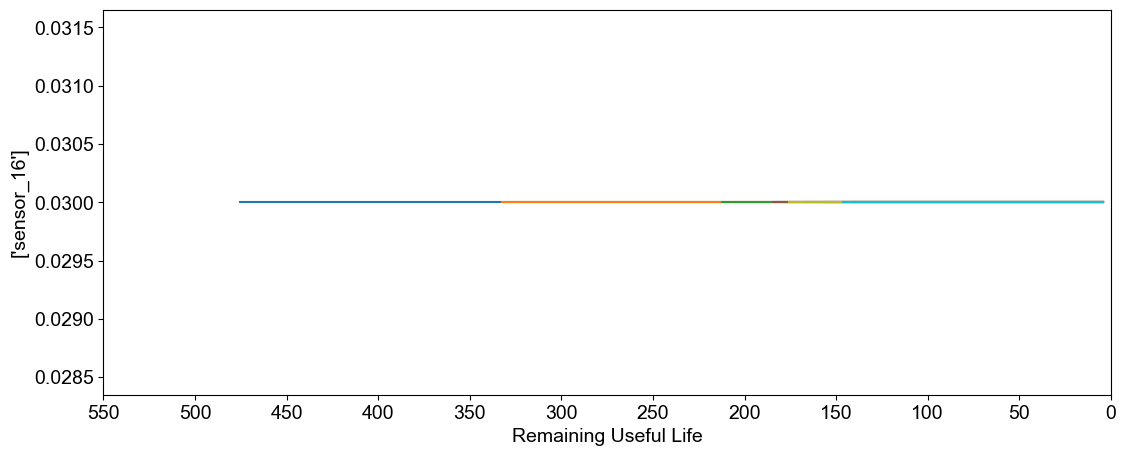

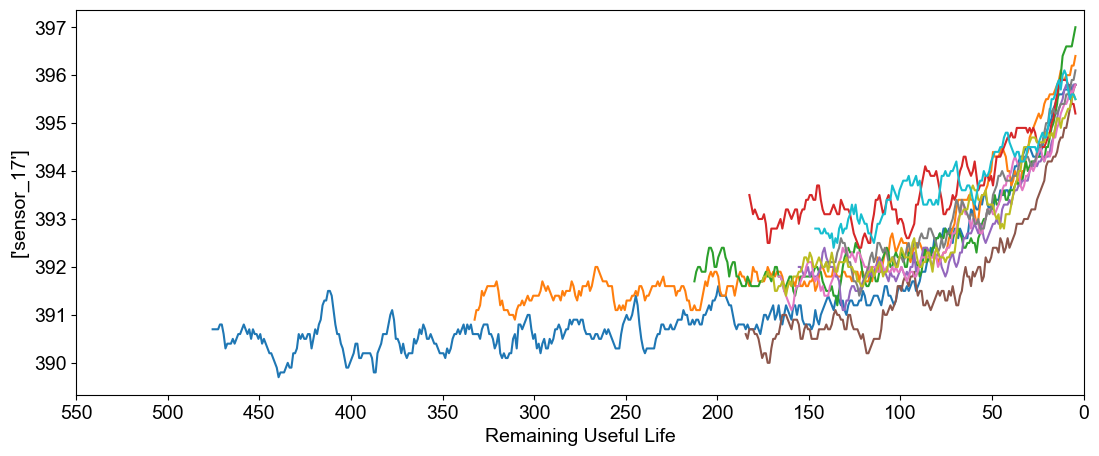

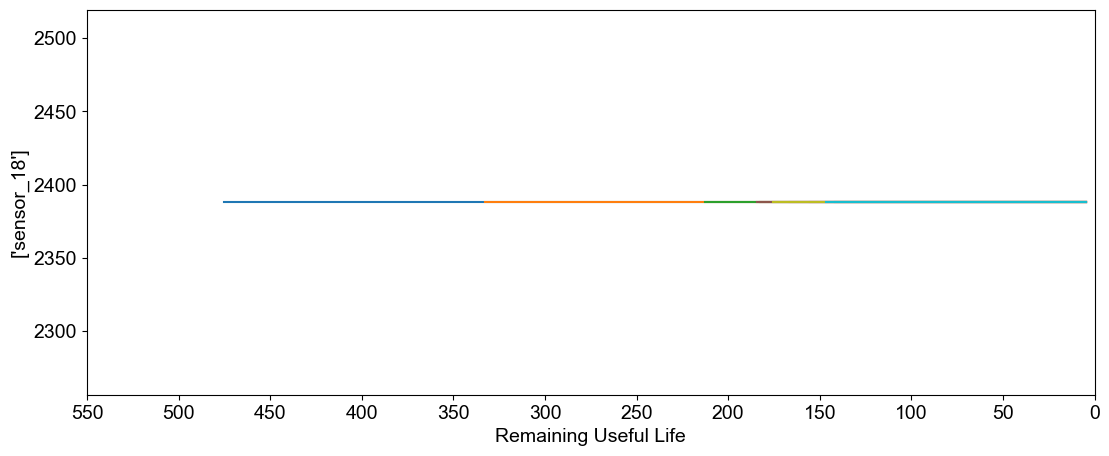

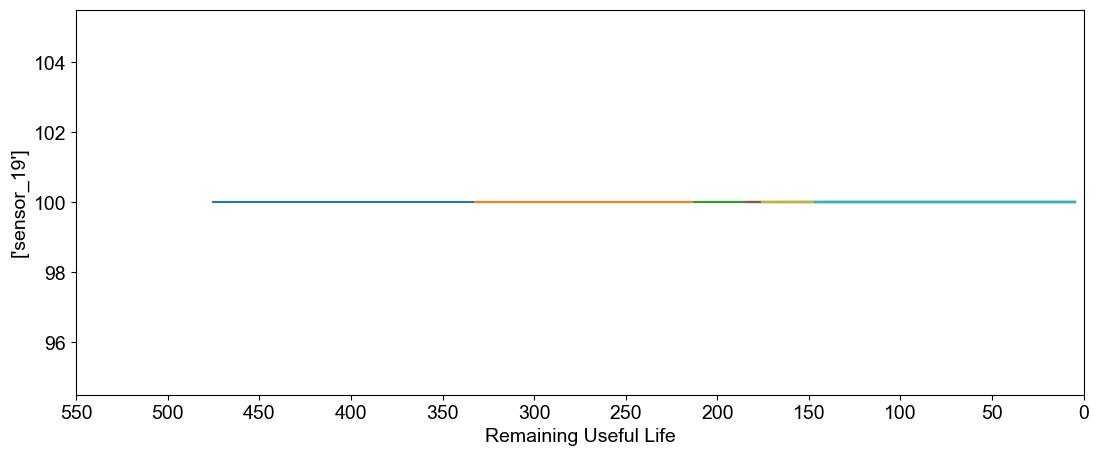

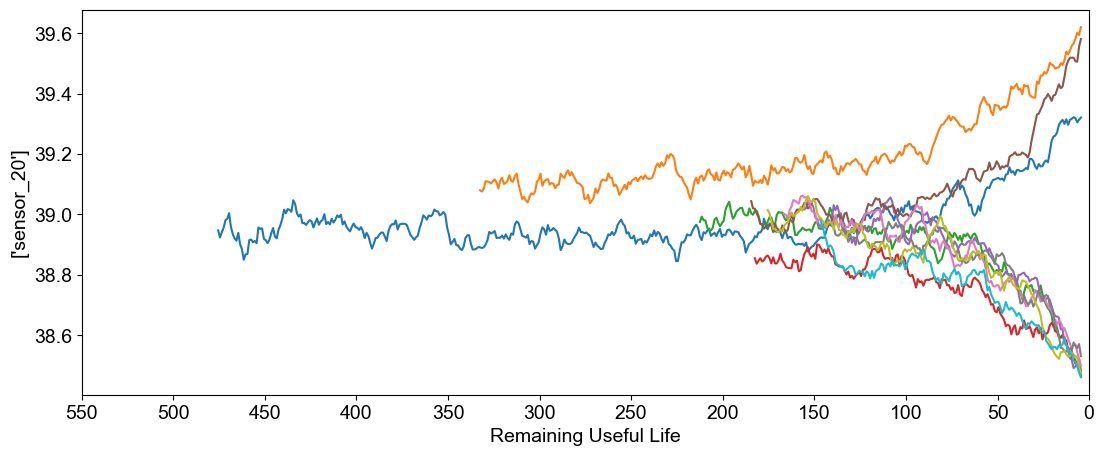

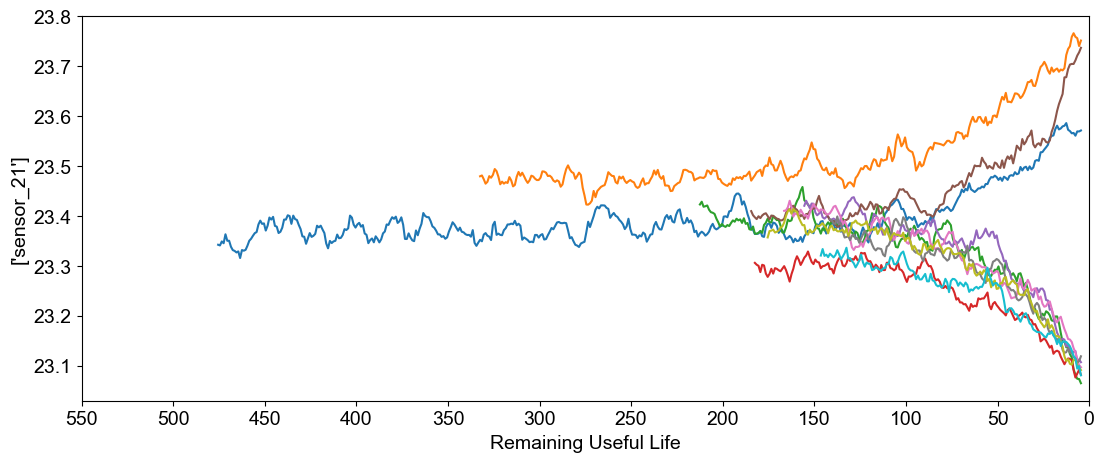

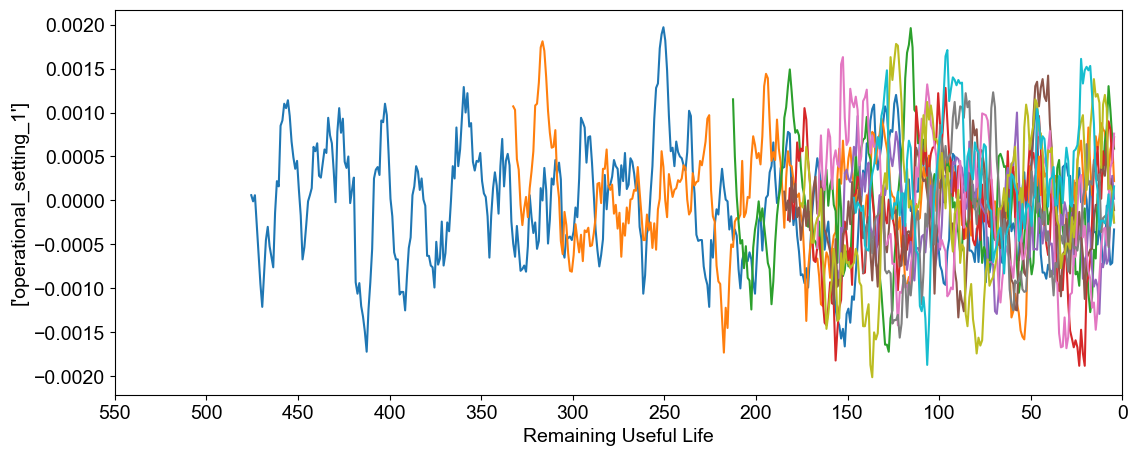

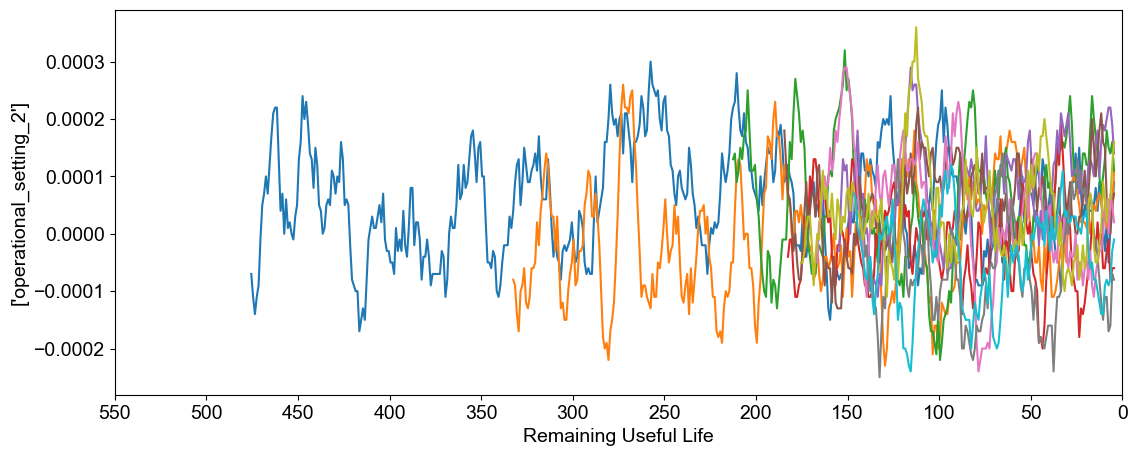

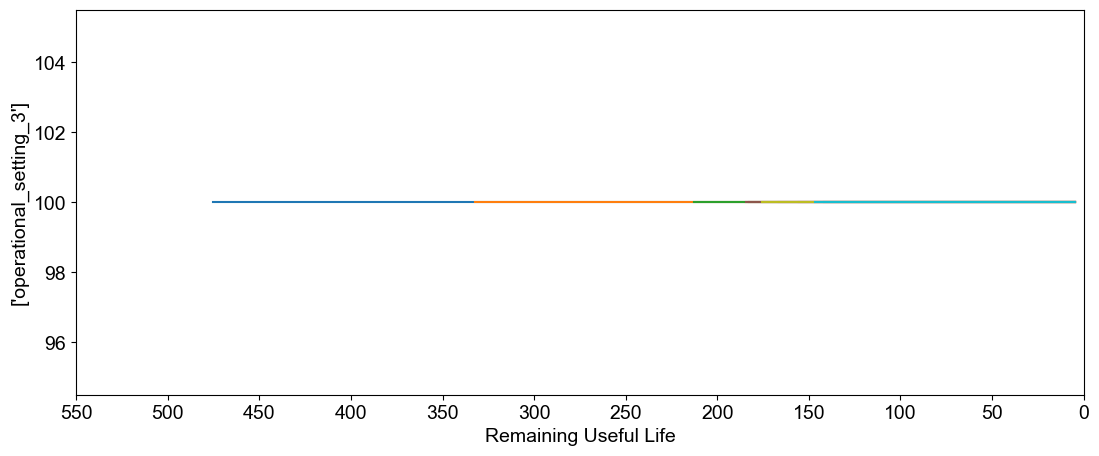

In [22]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

def plot_feature(df,signal_name):
    plt.figure(figsize=(13,5))
    for i in df['engineID'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['engineID']==i].rolling(10).mean())

    plt.xlim(320, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 600, 50))
    plt.ylabel([signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()
    
for i in range(1,22):
    try:
        plot_feature(train_data,'sensor_'+str(i))
    except:
        pass

plot_feature(train_data, 'operational_setting_1')
plot_feature(train_data, 'operational_setting_2')
plot_feature(train_data, 'operational_setting_3')

# Heat Map: Discovering Correlations

This code computes the correlation matrix for the train_data dataset and creates a heatmap using seaborn library to visualize the correlations between variables. The heatmap is annotated with correlation values, and a coolwarm color palette is used to represent the strength and direction of the correlations. The plot is displayed with a title and optimized layout for better visualization.

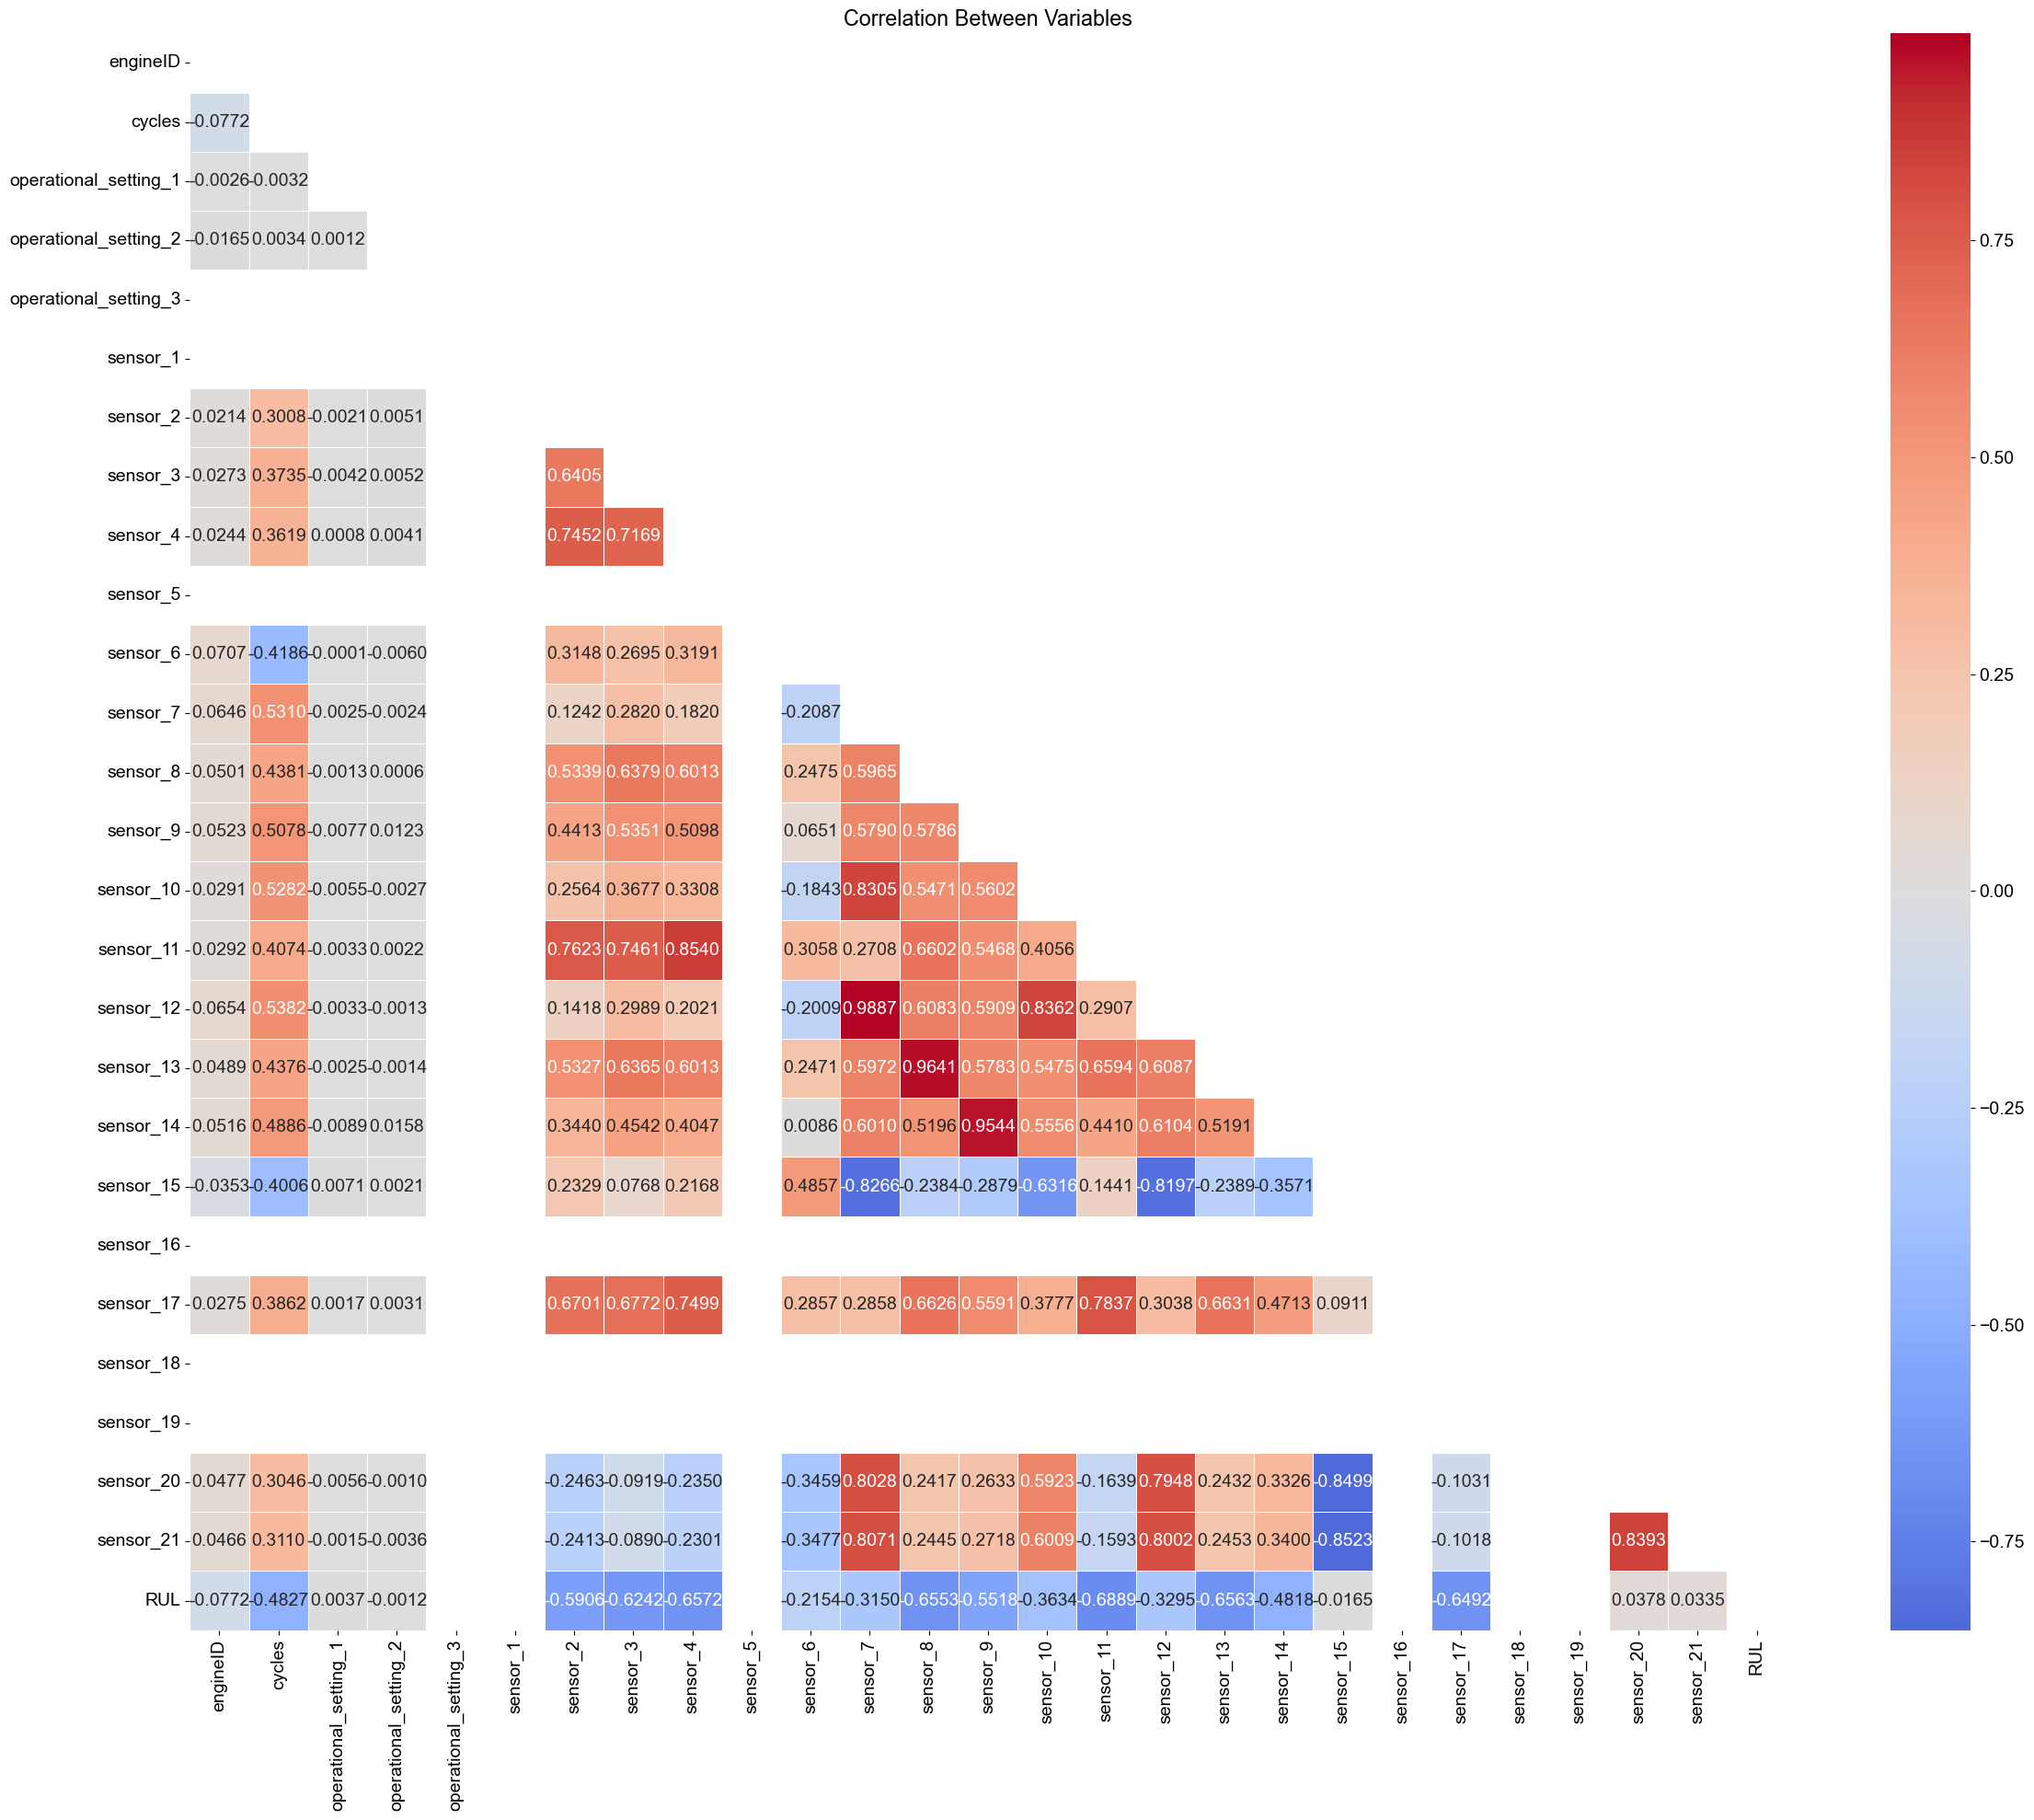

In [23]:
# Compute the correlation matrix
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot=True, fmt=".4f")
plt.title('Correlation Between Variables')
plt.tight_layout()
plt.show()

In [24]:
# Compute the correlation matrix
corr = train_data.corr()

corr_RUL = corr[['RUL']]
corr_df = pd.DataFrame({'Feature': corr_RUL.index, 'Correlation with RUL': corr_RUL['RUL'].values})
corr_df['Correlation with RUL'] = corr_df['Correlation with RUL'].abs() # take absolute correlation values
corr_df = corr_df.sort_values(by='Correlation with RUL', ascending=False)
corr_df

Feature  Correlation with RUL
26                    RUL              1.000000
15              sensor_11              0.688915
8                sensor_4              0.657224
17              sensor_13              0.656340
12               sensor_8              0.655345
21              sensor_17              0.649220
7                sensor_3              0.624236
6                sensor_2              0.590564
13               sensor_9              0.551843
1                  cycles              0.482744
18              sensor_14              0.481807
14              sensor_10              0.363432
16              sensor_12              0.329452
11               sensor_7              0.315048
10               sensor_6              0.215352
0                engineID              0.077196
24              sensor_20              0.037782
25              sensor_21              0.033465
19              sensor_15              0.016501
2   operational_setting_1              0.003700
3   operational_setting_2              0.001204
4   operational_setting_3                   NaN
5                sensor_1                   NaN
9                sensor_5                   NaN
20              sensor_16                   NaN
22              sensor_18                   NaN
23              sensor_19                   NaN

Summary on Correlation: 
- If a feature has zero variance (i.e., constant), then its correlation with other features and the target variable will be NaN since the variance of the feature is zero, and division by zero is undefined. Therefore, if a feature has zero variance, its correlation value will be NaN.
- The sign of the correlation coefficient indicates the direction of the relationship between two variables. A positive correlation coefficient indicates that as one variable increases, the other variable also increases. For example, if we look at the correlation between temperature and ice cream sales, we would expect a positive correlation coefficient, as warmer temperatures would likely lead to an increase in ice cream sales.
- On the other hand, a negative correlation coefficient indicates that as one variable increases, the other variable decreases. For example, if we look at the correlation between smoking and lung cancer, we would expect a negative correlation coefficient, as smoking increases the risk of lung cancer.
- So, the sign of the correlation coefficient is important because it helps us understand the nature of the relationship between two variables. However, if we are only interested in the strength of the relationship and not the direction, we can take the absolute value of the correlation coefficient.

Based on the correlation values with RUL, the most important features for the ML model are shown above. These features have a relatively higher correlation with RUL compared to other features in the dataset. However, it's important to note that correlation does not necessarily imply causation and there might be other features that are important for the ML model. Therefore, we will perform additional feature selection techniques like the feature importance scoring algorithms to identify the most relevant features for the ML model.

# Feature Importance Analysis: 

Feature importance values indicate how much each feature contributes to the model's ability to make accurate predictions. The importance values are relative to the other features in the dataset, and they are calculated based on how much the model's performance decreases when a feature is randomly shuffled or removed from the dataset.

So, if a feature has a high importance value, it means that the model relies heavily on that feature to make accurate predictions. If a feature has a low importance value, it means that the model doesn't rely on that feature very much, and removing it from the dataset may not affect the model's performance very much. 

However, it's important to note that feature importance values are not absolute measures of feature usefulness, and they can be influenced by the other features in the dataset and the specific model and hyperparameters used.

Note: When we drop a feature from the analysis, the feature importance values for the remaining features may change. 

The following code selects important features from the given data using four different feature selection methods:
- correlation with RUL
- Random Forest feature importance
- Lasso feature importance
- Gradient Boosting feature importance. 

It then merges the results of these four methods into a single dataframe and displays the selected features from each approach.The code also calculates the number of selected features for each method and prints the results.

In [25]:
# Approach 1: Correlation with RUL
corr_threshold = 0.1 
corr = train_data.corr()
corr_RUL = corr[['RUL']]
corr_df = pd.DataFrame({'Feature': corr_RUL.index, 'Correlation with RUL': corr_RUL['RUL'].values})
corr_df['Correlation with RUL'] = corr_df['Correlation with RUL'].abs() # take absolute correlation values
corr_df = corr_df.sort_values(by='Correlation with RUL', ascending=False)
selected_features_corr = corr_df[corr_df['Correlation with RUL'] > corr_threshold]['Feature'].values
selected_features_corr = [feature for feature in selected_features_corr if feature not in ['RUL', 'unit', 'cycles']]
print("Number of selected features (CORR):", len(selected_features_corr))

# Approach 2: Random Forest Feature Importance
X = train_data.drop(['RUL'], axis=1)
X.drop(['cycles'], axis=1, inplace=True)  # drop cycles column
X.drop(['engineID'], axis=1, inplace=True)  # drop unit column
y = train_data['RUL']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importances_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_rf = feature_importances_rf.sort_values('Importance', ascending=False)
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X, y)
X_train_selected = sfm.transform(X)
print("Number of selected features (RF):", X_train_selected.shape[1])
selected_features_rf = X.columns[sfm.get_support()]

# Approach 3: Lasso Feature Importance
X = train_data.drop(['RUL'], axis=1)
X.drop(['cycles', 'engineID'], axis=1, inplace=True)  # drop cycles and unit columns
y = train_data['RUL']
scaler = StandardScaler()
X = scaler.fit_transform(X)
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X, y)
coef_abs = np.abs(lasso.coef_)
coef_abs /= np.sum(coef_abs)  # normalize to sum to 1
feature_importances_lr = pd.DataFrame({'Feature': train_data.columns[2:-1], 'Importance': coef_abs})
feature_importances_lr = feature_importances_lr.sort_values('Importance', ascending=False)
selected_features_lr = feature_importances_lr[feature_importances_lr['Importance'] != 0]['Feature'].values
print("Number of selected features (Lasso):", len(selected_features_lr))

# Approach 4: Gradient Boosting Feature Importance
X = train_data.drop(['RUL'], axis=1)
X.drop(['cycles'], axis=1, inplace=True)  # drop cycles column
X.drop(['engineID'], axis=1, inplace=True)  # drop unit column
y = train_data['RUL']
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X, y)
importances = gb.feature_importances_
feature_importances_gb = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_gb = feature_importances_gb.sort_values('Importance', ascending=False)
selected_features_gb = feature_importances_gb[feature_importances_gb['Importance'] != 0]['Feature'].values
print("Number of selected features (Gradient Boosting):", len(selected_features_gb))

# Display the selected features from each approach
print("Selected Features:")
print("Correlation with RUL:", selected_features_corr)
print("Random Forest Importance:", selected_features_rf)
print("Lasso Importance:", selected_features_lr)
print("Gradient Boosting Importance:", selected_features_gb)

Number of selected features (CORR): 13
Number of selected features (RF): 12
Number of selected features (Lasso): 18
Number of selected features (Gradient Boosting): 17
Selected Features:
Correlation with RUL: ['sensor_11', 'sensor_4', 'sensor_13', 'sensor_8', 'sensor_17', 'sensor_3', 'sensor_2', 'sensor_9', 'sensor_14', 'sensor_10', 'sensor_12', 'sensor_7', 'sensor_6']
Random Forest Importance: Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_9',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_21'],
      dtype='object')
Lasso Importance: ['sensor_13' 'sensor_11' 'sensor_8' 'sensor_9' 'sensor_4' 'sensor_17'
 'sensor_3' 'sensor_14' 'sensor_2' 'sensor_6' 'sensor_20' 'sensor_21'
 'sensor_10' 'sensor_15' 'sensor_7' 'operational_setting_2' 'sensor_12'
 'operational_setting_1']
Gradient Boosting Importance: ['sensor_11' 'sensor_4' 'sensor_12' 'sensor_9' 'sensor_13' 'sensor_6'
 'sensor_14' 'sensor_17' 'sensor_3' 'sensor_8' 'sens

We will test our code with different features selected from the above 4 appropaches.

In [26]:
# Merge dataframes
merged_df = pd.merge(corr_df[~corr_df['Feature'].isin(['RUL'])], feature_importances_rf, on='Feature', how='outer')
merged_df = pd.merge(merged_df, feature_importances_lr, on='Feature', how='outer')
merged_df = pd.merge(merged_df, feature_importances_gb, on='Feature', how='outer')

merged_df.fillna(0, inplace=True)
merged_df['Correlation Rank'] = merged_df['Correlation with RUL'].rank(method='dense', ascending=False)
merged_df['RF Rank'] = merged_df['Importance_x'].rank(method='dense', ascending=False)
merged_df['Lasso Rank'] = merged_df['Importance_y'].rank(method='dense', ascending=False)
merged_df['GB Rank'] = merged_df['Importance'].rank(method='dense', ascending=False)

merged_df.rename(columns={'Importance_x': 'RF Importance', 'Importance_y': 'Lasso Importance'}, inplace=True)

# Sort by correlation rank
merged_df.sort_values('Correlation Rank', inplace=True)

merged_df


Feature  Correlation with RUL  RF Importance  \
0               sensor_11              0.688915       0.448674   
1                sensor_4              0.657224       0.033315   
2               sensor_13              0.656340       0.024296   
3                sensor_8              0.655345       0.019896   
4               sensor_17              0.649220       0.007138   
5                sensor_3              0.624236       0.024851   
6                sensor_2              0.590564       0.022576   
7                sensor_9              0.551843       0.083415   
8                  cycles              0.482744       0.000000   
9               sensor_14              0.481807       0.034747   
10              sensor_10              0.363432       0.000092   
11              sensor_12              0.329452       0.129918   
12               sensor_7              0.315048       0.034828   
13               sensor_6              0.215352       0.034664   
14               engineID              0.077196       0.000000   
15              sensor_20              0.037782       0.019469   
16              sensor_21              0.033465       0.025037   
17              sensor_15              0.016501       0.025656   
18  operational_setting_1              0.003700       0.019259   
19  operational_setting_2              0.001204       0.012168   
20  operational_setting_3              0.000000       0.000000   
21               sensor_1              0.000000       0.000000   
22               sensor_5              0.000000       0.000000   
23              sensor_16              0.000000       0.000000   
24              sensor_18              0.000000       0.000000   
25              sensor_19              0.000000       0.000000   

    Lasso Importance  Importance  Correlation Rank  RF Rank  Lasso Rank  \
0           0.138442    0.428122               1.0      1.0         2.0   
1           0.085046    0.139776               2.0      7.0         5.0   
2           0.162906    0.052950               3.0     11.0         1.0   
3           0.128990    0.026601               4.0     13.0         3.0   
4           0.060284    0.035653               5.0     17.0         6.0   
5           0.056033    0.028335               6.0     10.0         7.0   
6           0.048649    0.009978               7.0     12.0         9.0   
7           0.091093    0.075379               8.0      3.0         4.0   
8           0.000000    0.000000               9.0     19.0        19.0   
9           0.054063    0.038899              10.0      5.0         8.0   
10          0.019440    0.000000              11.0     18.0        13.0   
11          0.001290    0.093574              12.0      2.0        17.0   
12          0.007782    0.020312              13.0      4.0        15.0   
13          0.044903    0.044259              14.0      6.0        10.0   
14          0.000000    0.000000              15.0     19.0        19.0   
15          0.043639    0.001555              16.0     14.0        11.0   
16          0.041002    0.002197              17.0      9.0        12.0   
17          0.014187    0.001589              18.0      8.0        14.0   
18          0.000452    0.000602              19.0     15.0        18.0   
19          0.001799    0.000220              20.0     16.0        16.0   
20          0.000000    0.000000              21.0     19.0        19.0   
21          0.000000    0.000000              21.0     19.0        19.0   
22          0.000000    0.000000              21.0     19.0        19.0   
23          0.000000    0.000000              21.0     19.0        19.0   
24          0.000000    0.000000              21.0     19.0        19.0   
25          0.000000    0.000000              21.0     19.0        19.0   

    GB Rank  
0       1.0  
1       2.0  
2       5.0  
3      10.0  
4       8.0  
5       9.0  
6      12.0  
7       4.0  
8      18.0  
9       7.0  
10     18.0  
11      3.0  
12     11.0  
13      6.0  

# Select set of feature for train and test model

We will un-comment and run the code four times to see the effectiveness of the feature selection technique.

In [27]:
# Editted features from heatmap correlation which corresponds to minimum number of features
#selected_features = selected_features_corr

# Editted features from RF regressor which corresponds to minimum number of features
selected_features = selected_features_rf

# Editted features from LASSO regressor which corresponds to minimum number of features
# selected_features = selected_features_lr

# Editted features from Gradient Boosting regressor which corresponds to minimum number of features
# selected_features = selected_features_gb

X_train = train_data[selected_features]

# Read and import test data sets

- 'test_FD003.txt' is the similar data sets of 'train_FD003.txt' with 28 column
- 'RUL_FD003.txt' is the data set of RUL of 100 indiviuald engines data

In [28]:
test_data = pd.read_csv('./test_FD003.txt', delimiter=' ', header=None)
y_test = pd.read_csv('./RUL_FD003.txt', delimiter=' ', header=None)
print(test_data.shape)
test_data.drop([26,27], axis=1, inplace=True) # drop columns containing NaN values

# Assign the entire column name with index names
test_data.columns=index_names + column_names

# Catagorised the selected column of X_test from the predefined 'selected_features_rf'
# Since the final RUL is based on last operation cycle of each engine. 
# The test_data are selected for the last row of each engine operation using '.last()'
test_data = test_data.groupby('engineID')[selected_features].last().reset_index() #.drop(drop_sum, axis=1)
# y_test.drop(columns=[1], inplace=True)
test_data['RUL'] = y_test[:][0]

(16596, 28)


In [29]:
# check the data type of each column in the DataFrame
print(test_data.dtypes)

# check if there are any columns with data type `object`
print(train_data.select_dtypes(include=['object']).columns)

engineID       int64
sensor_2     float64
sensor_3     float64
sensor_4     float64
sensor_6     float64
sensor_7     float64
sensor_9     float64
sensor_11    float64
sensor_12    float64
sensor_13    float64
sensor_14    float64
sensor_15    float64
sensor_21    float64
RUL            int64
dtype: object
Index([], dtype='object')


In [30]:
# Check for null values
null_values = test_data.isnull().sum()
print("Total number of NaN values in the FD004 data set is:",null_values)

Total number of NaN values in the FD004 data set is: engineID     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_6     0
sensor_7     0
sensor_9     0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_21    0
RUL          0
dtype: int64


In [31]:
# Select the test data set from test_data frame 

X_test = test_data[selected_features]
y_test = test_data['RUL'] 

# Verify the (X_train, y_train) and (X_test, y_test)

In [32]:
X_train
# X_train.shape

sensor_2  sensor_3  sensor_4  sensor_6  sensor_7  sensor_9  sensor_11  \
0        642.36   1583.23   1396.84     21.61    553.97   9062.17      47.30   
1        642.50   1584.69   1396.89     21.61    554.55   9061.78      47.23   
2        642.18   1582.35   1405.61     21.61    554.43   9070.23      47.22   
3        642.92   1585.61   1392.27     21.61    555.21   9064.57      47.24   
4        641.68   1588.63   1397.65     21.61    554.74   9076.14      47.15   
...         ...       ...       ...       ...       ...       ...        ...   
24715    643.78   1596.01   1424.11     21.61    551.86   9070.82      48.27   
24716    643.29   1596.38   1429.14     21.61    551.86   9064.60      48.13   
24717    643.84   1604.53   1431.41     21.61    551.30   9063.45      48.18   
24718    643.94   1597.56   1426.57     21.61    550.69   9062.22      48.05   
24719    643.64   1599.04   1436.06     21.61    550.96   9066.52      48.12   

       sensor_12  sensor_13  sensor_14  sensor_15  sensor_21  
0         522.31    2388.01    8145.32     8.4246    23.3537  
1         522.42    2388.03    8152.85     8.4403    23.4491  
2         522.03    2388.00    8150.17     8.3901    23.3669  
3         522.49    2388.08    8146.56     8.3878    23.2951  
4         522.58    2388.03    8147.80     8.3869    23.4583  
...          ...        ...        ...        ...        ...  
24715     519.66    2388.30    8138.08     8.5036    22.9631  
24716     519.91    2388.28    8144.36     8.5174    22.9746  
24717     519.44    2388.24    8135.95     8.5223    23.0682  
24718     520.01    2388.26    8141.24     8.5148    23.0753  
24719     519.48    2388.24    8136.98     8.5150    23.0847  

[24720 rows x 12 columns]

In [33]:
y_train=train_data['RUL']
y_train
# y_train.shape

0        258
1        257
2        256
3        255
4        254
        ... 
24715      4
24716      3
24717      2
24718      1
24719      0
Name: RUL, Length: 24720, dtype: int64

In [34]:
X_test

# X_test.shape

sensor_2  sensor_3  sensor_4  sensor_6  sensor_7  sensor_9  sensor_11  \
0     642.59   1592.40   1409.87     21.58    560.53   9085.50      47.53   
1     642.56   1587.42   1409.69     21.61    553.33   9050.97      47.71   
2     642.75   1591.93   1417.66     21.60    563.61   9091.69      47.68   
3     642.28   1584.68   1406.56     21.61    552.75   9048.23      47.26   
4     642.15   1580.59   1397.26     21.58    553.82   9050.89      47.09   
..       ...       ...       ...       ...       ...       ...        ...   
95    642.89   1592.93   1409.28     21.60    560.47   9073.16      47.60   
96    642.32   1585.11   1390.01     21.61    554.60   9052.78      47.05   
97    643.35   1592.18   1426.93     21.61    552.34   9116.53      47.83   
98    642.78   1597.57   1419.47     21.59    566.57   9105.74      48.09   
99    643.19   1592.54   1407.20     21.58    562.32   9094.27      47.71   

    sensor_12  sensor_13  sensor_14  sensor_15  sensor_21  
0      528.05    2388.23    8158.77     8.2966    23.5679  
1      520.90    2388.17    8128.04     8.4514    23.2821  
2      531.36    2388.33    8173.56     8.3057    23.6440  
3      521.27    2388.09    8133.78     8.4337    23.3804  
4      521.74    2387.96    8132.51     8.3900    23.4463  
..        ...        ...        ...        ...        ...  
95     527.72    2388.16    8153.13     8.3492    23.5618  
96     522.73    2387.98    8138.86     8.4064    23.4327  
97     520.87    2388.10    8189.23     8.4641    23.2097  
98     534.03    2388.47    8185.00     8.2459    23.7059  
99     529.59    2388.29    8169.24     8.3191    23.6536  

[100 rows x 12 columns]

In [35]:
y_test
# y_test.shape

0      44
1      51
2      27
3     120
4     101
     ... 
95    113
96    123
97     17
98      8
99     28
Name: RUL, Length: 100, dtype: int64

# Define error function and Sklearn barplot

Create an error calculation ML function to measure the error betwen true and predicted values

In [36]:
# Error function based on true and predicted data-sets 
# RMSE - root mean squared error
# R2 score - measure the goodness of fit in percentage
def ML_error(y_true, y_pred, label='test'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_pred)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    error = [rmse, variance]
    return error

# Scikit learn berplot
def ML_error_plot(ML_error_dic, dataSetName):
    ML_df = pd.DataFrame(ML_error_dic, index=['RMSE', 'R2 Score'])
    Model_df = ML_df.T
    ax1 = sns.barplot(x=Model_df.index, y=Model_df['RMSE'], data=Model_df)
    ax1.set(xlabel = 'ML Model',  title='RMSE ' + str(dataSetName) + ' model')
    plt.xticks(rotation=70)
    plt.show()

    ax2 = sns.barplot(x=Model_df.index, y=Model_df['R2 Score'], data=Model_df)
    ax2.set(xlabel = 'ML Model',  title='R2 Score ' + str(dataSetName) + ' model')
    plt.xticks(rotation=70)
    plt.show()

# Exploring various ML models and calculating ML_error
The lists of ML models are as follows:

- Linear Regression: Linear regression determines the linear relation that best fits a set of discrete data points. At the start of the project, the fundamental Machine Learning method of linear regression is used here because of its simplicity and essential features relation.

- Polynomial Regression: Polynomial regression is a type of linear regression wherein the relationship between the dependent and independent variables is predicted by the nth degree of the polynomial.

- K-Nearest Neighbour Regressor: K-NN is a non-parametric supervised learning classifier method that uses proximity to make classifications or predictions about the grouping of an individual data point by computing the local probability. However, KNN regression is used to predict the output variable using the local average. Here, K -means the number of the classifier as we increase or decrease the prediction gets better. Herein, we have tuned the hyperparameters K to find the best optimal prediction based on the rank of the classifier.

- LASSO Regression: Least Absolute Shrinkage and Selection Operator (LASSO) is used for regularization and feature selection. This model uses the L1 regularization technique, where the penalty term '\alpha' determines the amount of shrinkage that can occur in the model equation. In the present work, we have also parameterized with '\alpha' as a hyper-parameters. Moreover, due to convergence with the model number of iterations is also parametrized. Finally, a grid-search-cv has been performed to obtain the best hyperparameters for the present data sets.

- Random Forest Regressor: Random Forest is an ensemble technique capable of performing both regression and classification tasks using multiple decision trees. Initially, every decision tree will have its own high variance, but when a parallel combination of multiple decision tree ensemble together, the resultant variance of each tree gets low. It happens because the resultant variance is now perfectly trained on that particular sample data and no longer depends on a decision tree but on ensemble multiple decision trees. As a result of the regression problem, the final output is the mean of all the output from every tree. As hyperparameter tuning, we have used max_fteatures selection as the square root of the number of features from selected feature sets. We have also used another parameter, 'random_state' 42, to sets a seed to the random generator for feature clustering.

- Support Vector Regression: Support vector regressor is a supervised learning algorithm that uses a similar support vector machine principle for discrete dataset clustering. The main idea behind SVR is to obtain a bet fit line known as a hyperplane with the maximum nubmer maximum number of points.

- Ensamble Learning: Ensamble learning is a machine learning approach where the voting ensemble makes model predictions of data points of different models. Ideally, a group of weak learners provides the prediction as one strong learner. This work uses an ensemble learning model combined with random forest and support vector regressor.


In [37]:
# Define ML_error test and train data sets dictonary

ML_error_before_scaled_train = {}
ML_error_before_scaled_test = {}

ML_error_after_scaled_train = {}
ML_error_after_scaled_test = {}


# Define ML model

In [38]:
# Linear Regression Model
pipeLinear = Pipeline([
    ("model",LinearRegression())
])

# Polynomial Regression Model
polynomial_regression = make_pipeline(
        PolynomialFeatures(degree=4, include_bias=False),
        LinearRegression(),
    )

# K-Nearest Neighbour Regression Model
pipeKNN = Pipeline([
    ("model",KNeighborsRegressor(n_neighbors=5))
])

# Least Absolute Shrinkage and Selection Operator (LASSO) Regression Model
pipeLasso = Pipeline([
        ("model",Lasso(alpha=0.1, max_iter=10000))
    ])

# Random Forest (RF) Regressor Model
rf_regressor = RandomForestRegressor(max_features="sqrt", random_state=42)

# SVR model
svm_regressor = SVR(kernel='rbf')

# Create the ensemble model with RF and SVM
ensemble_regressor = VotingRegressor(estimators=[('rf_regressor', rf_regressor), ('svm_regressor', svm_regressor)])


# Train and test of ML Model before scaling of datasets.

In [39]:
# Train the models
pipeLinear.fit(X_train,y_train)
polynomial_regression.fit(X_train, y_train)
pipeLasso.fit(X_train,y_train)
pipeKNN.fit(X_train,y_train)
rf_regressor.fit(X_train, y_train)
svm_regressor.fit(X_train, y_train)
ensemble_regressor.fit(X_train, y_train)

# Evaluate the models on training set
y_pred_train_Lin = pipeLinear.predict(X_train)
y_pred_train_polyReg = polynomial_regression.predict(X_train)
y_pred_train_Lasso = pipeLasso.predict(X_train)
y_pred_train_KNN = pipeKNN.predict(X_train)
y_pred_train_rf = rf_regressor.predict(X_train)
y_pred_train_svm = svm_regressor.predict(X_train)
y_pred_train_ensemble = ensemble_regressor.predict(X_train)

print("Liner Regression - Training Set:")
ML_error_before_scaled_train['LR'] = ML_error(y_train, y_pred_train_Lin, 'train')
print("Ploynomial Regressor - Train Set:")
ML_error_before_scaled_train['PR'] = ML_error(y_train, y_pred_train_polyReg, 'train')
print("KNN Regressor - Training Set:")
ML_error_before_scaled_train['KNN'] = ML_error(y_train, y_pred_train_KNN, 'train')
print("Lasso Regressor - Training Set:")
ML_error_before_scaled_train['LASSO'] = ML_error(y_train, y_pred_train_Lasso, 'train')
print("Random Forest - Training Set:")
ML_error_before_scaled_train['RF'] = ML_error(y_train, y_pred_train_rf, 'train')
print("SVM - Training Set:")
ML_error_before_scaled_train['SVM'] = ML_error(y_train, y_pred_train_svm, 'train')
print("Ensemble - Training Set:")
ML_error_before_scaled_train['RF SVM Ensm'] = ML_error(y_train, y_pred_train_ensemble, 'train')

# Predict the models on test data set
y_pred_test_Lin = pipeLinear.predict(X_test)
y_pred_test_polyReg = polynomial_regression.predict(X_test)
y_pred_test_Lasso = pipeLasso.predict(X_test)
y_pred_test_KNN = pipeKNN.predict(X_test)
y_pred_test_rf = rf_regressor.predict(X_test)
y_pred_test_svm = svm_regressor.predict(X_test)
y_pred_test_ensemble = ensemble_regressor.predict(X_test)

print("Liner Regression - Test Set:")
ML_error_before_scaled_test['LR'] = ML_error(y_test, y_pred_test_Lin, 'test')
print("Ploynomial Regrssion - Test Set:")
ML_error_before_scaled_test['PR'] = ML_error(y_test, y_pred_test_polyReg, 'test')
print("KNN Regressor - Test Set:")
ML_error_before_scaled_test['KNN'] = ML_error(y_test, y_pred_test_KNN, 'test')
print("Lasso Regressor - Test Set:")
ML_error_before_scaled_test['LASSO'] = ML_error(y_test, y_pred_test_Lasso, 'test')
print("Random Forest - Test Set:")
ML_error_before_scaled_test['RF'] = ML_error(y_test, y_pred_test_rf, 'test')
print("SVM - Test Set:")
ML_error_before_scaled_test['SVM'] = ML_error(y_test, y_pred_test_svm, 'test')
print("Ensemble - Test Set:")
ML_error_before_scaled_test['RF SVM Ensm'] = ML_error(y_test, y_pred_test_ensemble, 'test')

Liner Regression - Training Set:
train set RMSE:63.79955473157298, R2:0.5833909208849349
Ploynomial Regressor - Train Set:
train set RMSE:57.18831574223192, R2:0.6652596642454988
KNN Regressor - Training Set:
train set RMSE:53.99988446889235, R2:0.7015448370279008
Lasso Regressor - Training Set:
train set RMSE:63.9468905239762, R2:0.5814645029093402
Random Forest - Training Set:
train set RMSE:20.938425437114386, R2:0.9551273751740619
SVM - Training Set:
train set RMSE:99.89219460771271, R2:-0.02130755363196246
Ensemble - Training Set:
train set RMSE:56.48762592559995, R2:0.6734121078105568
Liner Regression - Test Set:
test set RMSE:57.632679583194424, R2:-0.9383347385285525
Ploynomial Regrssion - Test Set:
test set RMSE:52.44061065843484, R2:-0.6048211355043622
KNN Regressor - Test Set:
test set RMSE:56.32098365618271, R2:-0.8511074011774993
Lasso Regressor - Test Set:
test set RMSE:57.8614840493467, R2:-0.9537558504941899
Random Forest - Test Set:
test set RMSE:47.50775464068998, R2:

# Scikit-learn barplot of RMSE and R2-score from all the ML model before scaling

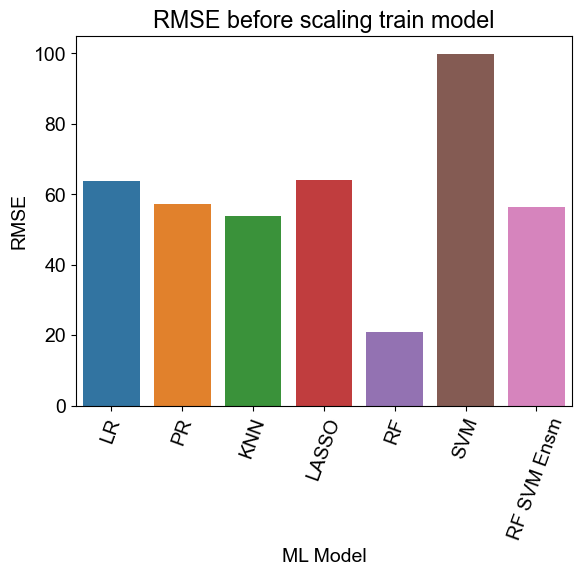

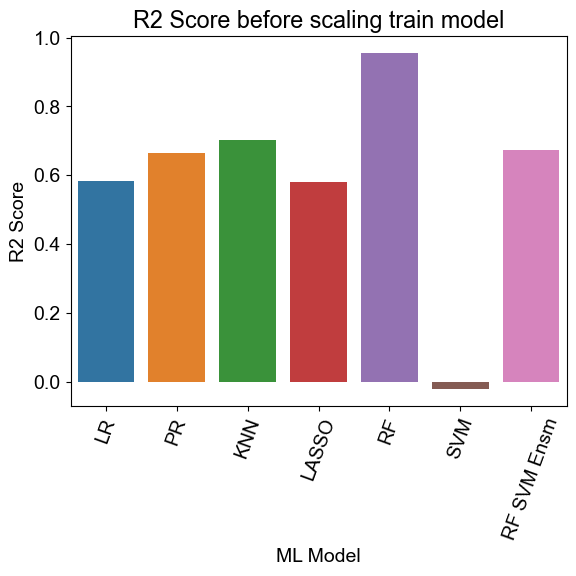

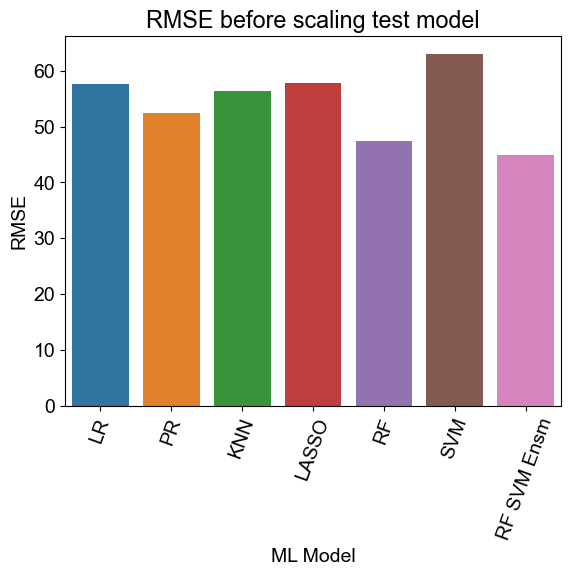

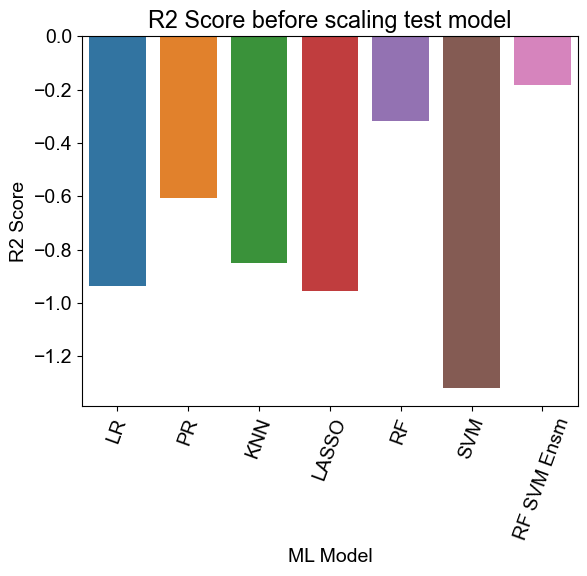

In [40]:
ML_error_plot(ML_error_before_scaled_train, 'before scaling train')
ML_error_plot(ML_error_before_scaled_test, 'before scaling test')

- Before scaling the train data sets, the RMSE values of random forest regression (RF) is low, and R2-score is also high, which means the RF is well-trained compared to other ML models. Although the RMSE values on test data sets show low in RF and RV-SVM ensemble models, the R2- score in all the models is negative, implying that the model's prediction is worse than a constant function that always predicts the mean of the data. Scaling the data sets before training and testing the ML model is necessary. 

# Define a function to plot scalled data

In [41]:
def plotScalledData(X_train, X_train_scaled, sclaingRule):
    fig, axs = plt.subplots(2, len(X_train.columns), figsize=(20, 8))
    for i, col in enumerate(X_train.columns):
        axs[0, i].hist(X_train[col], bins=50)
        axs[0, i].set_xlabel(col)

    for i, col in enumerate(X_train.columns):
        axs[1, i].hist(X_train_scaled[:, i], bins=50)
        axs[1, i].set_xlabel(col)

    axs[0, 0].set_title('Before '+ str(sclaingRule) +' Scaling')
    axs[1, 0].set_title('After '+ str(sclaingRule) +' Scaling')
    fig.subplots_adjust(hspace=0.4)
    plt.show()

# Feature Scaling - MinMaxScalar()

- MinMaxScaler() to scale the data sets in [0, 1] interval.

Here the rest of the model can be tested with two diffent scaling.


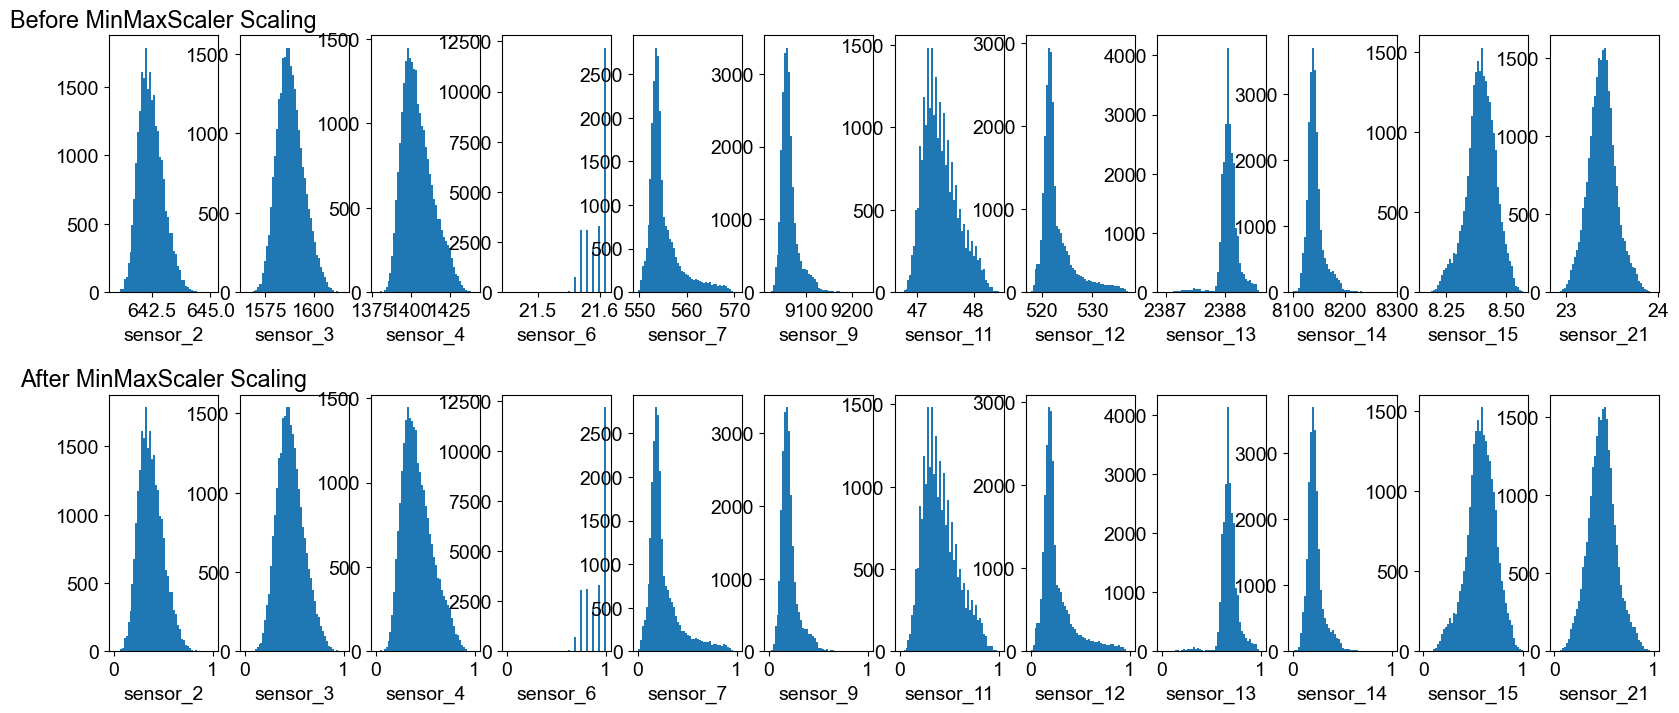

In [42]:
# initialize the MinMaxScaler
scaler = MinMaxScaler()

# fit and transform the scaler on the train & test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plotScalledData(X_train, X_train_scaled, 'MinMaxScaler')

For the time being we have tested with MinMaxScalar then apply StandardScalar scaling rules.

# # Feature Scaling - StandardScalar() scaling
- StandardScaller() to scale the data sets in (-1, 1) interval with a unit variance.

In [43]:
# # from sklearn.preprocessing import StandardScaler

# # initialize the StanardScaler
# scaler = StandardScaler()

# # fit and transform the scaler on the train & test data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# plotScalledData(X_train, X_train_scaled, 'StandardScaling')

# Train and test the ML model after Scaling

In [44]:
# Train the ML models
pipeLinear.fit(X_train_scaled,y_train)
polynomial_regression.fit(X_train_scaled, y_train)
pipeLasso.fit(X_train_scaled,y_train)
pipeKNN.fit(X_train_scaled,y_train)
rf_regressor.fit(X_train_scaled, y_train)
svm_regressor.fit(X_train_scaled, y_train)
ensemble_regressor.fit(X_train_scaled, y_train)

# Evaluate the models on training set
y_pred_train_Lin = pipeLinear.predict(X_train_scaled)
y_pred_train_polyReg = polynomial_regression.predict(X_train_scaled)
y_pred_train_Lasso = pipeLasso.predict(X_train_scaled)
y_pred_train_KNN = pipeKNN.predict(X_train_scaled)
y_pred_train_rf = rf_regressor.predict(X_train_scaled)
y_pred_train_svm = svm_regressor.predict(X_train_scaled)
y_pred_train_ensemble = ensemble_regressor.predict(X_train_scaled)

print("Liner Regression - Training Set:")
ML_error_after_scaled_train['LR'] = ML_error(y_train, y_pred_train_Lin, 'train')
print("Ploynomial Regressor - Train Set:")
ML_error_after_scaled_train['PR'] = ML_error(y_train, y_pred_train_polyReg, 'train')
print("Lasso Regressor - Training Set:")
ML_error_after_scaled_train['LASSO'] = ML_error(y_train, y_pred_train_Lasso, 'train')
print("KNN Regressor - Training Set:")
ML_error_after_scaled_train['KNN'] = ML_error(y_train, y_pred_train_KNN, 'train')
print("Random Forest - Training Set:")
ML_error_after_scaled_train['RF'] = ML_error(y_train, y_pred_train_rf, 'train')
print("SVM - Training Set:")
ML_error_after_scaled_train['SVM'] = ML_error(y_train, y_pred_train_svm, 'train')
print("Ensemble - Training Set:")
ML_error_after_scaled_train['RF SVM Ensm'] = ML_error(y_train, y_pred_train_ensemble, 'train')

# Predict the models on test data sets
y_pred_test_Lin = pipeLinear.predict(X_test_scaled)
y_pred_test_polyReg = polynomial_regression.predict(X_test_scaled)
y_pred_test_Lasso = pipeLasso.predict(X_test_scaled)
y_pred_test_KNN = pipeKNN.predict(X_test_scaled)
y_pred_test_rf = rf_regressor.predict(X_test_scaled)
y_pred_test_svm = svm_regressor.predict(X_test_scaled)
y_pred_test_ensemble = ensemble_regressor.predict(X_test_scaled)

print("Liner Regression - Test Set:")
ML_error_after_scaled_test['LR'] = ML_error(y_test, y_pred_test_Lin, 'test')
print("Ploynomial Regressor - Test Set:")
ML_error_after_scaled_test['PR'] = ML_error(y_test, y_pred_test_polyReg, 'test')
print("KNN Regressor - Test Set:")
ML_error_after_scaled_test['KNN'] = ML_error(y_test, y_pred_test_KNN, 'test')
print("Lasso Regressor - Test Set:")
ML_error_after_scaled_test['Lasso'] = ML_error(y_test, y_pred_test_Lasso, 'test')
print("Random Forest - Test Set:")
ML_error_after_scaled_test['RF'] = ML_error(y_test, y_pred_test_rf, 'test')
print("SVM - Test Set:")
ML_error_after_scaled_test['SVM'] = ML_error(y_test, y_pred_test_svm, 'test')
print("Ensemble - Test Set:")
ML_error_after_scaled_test['RF SVM Ensm'] = ML_error(y_test, y_pred_test_ensemble, 'test')

Liner Regression - Training Set:
train set RMSE:63.79955473157278, R2:0.5833909208849375
Ploynomial Regressor - Train Set:
train set RMSE:55.1680975106615, R2:0.6884918241223725
Lasso Regressor - Training Set:
train set RMSE:63.87390978461135, R2:0.5824192827179488
KNN Regressor - Training Set:
train set RMSE:50.13879155996733, R2:0.742699186283502
Random Forest - Training Set:
train set RMSE:20.9399013940466, R2:0.9551210487770586
SVM - Training Set:
train set RMSE:61.48001290997592, R2:0.6131333125264231
Ensemble - Training Set:
train set RMSE:40.38830534453113, R2:0.8330429752720128
Liner Regression - Test Set:
test set RMSE:57.63267958319294, R2:-0.9383347385284524
Ploynomial Regressor - Test Set:
test set RMSE:47.583837867304624, R2:-0.32132632899458624
KNN Regressor - Test Set:
test set RMSE:51.888908256004, R2:-0.5712316590546112
Lasso Regressor - Test Set:
test set RMSE:57.4711266620954, R2:-0.9274830916024934
Random Forest - Test Set:
test set RMSE:47.51162166249432, R2:-0.317

- In addition to the predefined ML model, in the next section, we perform grid_srarch_cv to determine the hyperparameters on a couple of ML models.

# Grid search CV for finding hyperparameters 
Here we performed grid_search_cv for KNN regression and LASSO regressor as follows. 
- In KNN regression, the model hyperparameters n_neighebors have been chosen from 1-20 to observe the parameter ranking based on the minimum RMSE score. We found that as we increase the n_neighbors, the model performs well. However, it is observed that the difference in RMSE score of rank 16 and 17 shows 0.75; therefore, for the time being, we restrict our model parameters n-neighbours to 5 in the KNN regression model.

In [45]:
# from sklearn.metrics import make_scorer, mean_squared_error
# define your own mse and set greater_is_better=False
# mse = make_scorer(mean_squared_error,greater_is_better=False)

pipeKNN_CV = Pipeline([
    ("model",KNeighborsRegressor())]
)

# Get the information about availabe hyper-parameter
print(pipeKNN_CV.get_params())


modelCV_KNN = GridSearchCV(estimator=pipeKNN_CV,
                            param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]},
                            scoring='neg_root_mean_squared_error'
                            )

modelCV_KNN.fit(X_train_scaled,y_train)

data_CV_KNN = pd.DataFrame(modelCV_KNN.cv_results_)

data_CV_KNN

{'memory': None, 'steps': [('model', KNeighborsRegressor())], 'verbose': False, 'model': KNeighborsRegressor(), 'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__metric_params': None, 'model__n_jobs': None, 'model__n_neighbors': 5, 'model__p': 2, 'model__weights': 'uniform'}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.014269      0.000396         0.181931        0.002876   
1        0.013306      0.000246         0.206075        0.003628   
2        0.013062      0.000118         0.221802        0.003918   
3        0.013502      0.000461         0.241753        0.006672   
4        0.013214      0.000273         0.249072        0.005506   
5        0.013311      0.000336         0.259257        0.003431   
6        0.013028      0.000114         0.263645        0.003919   
7        0.013534      0.000808         0.278501        0.004063   
8        0.013080      0.000126         0.278005        0.004118   
9        0.013049      0.000101         0.284475        0.004347   
10       0.013019      0.000094         0.289379        0.004437   
11       0.013131      0.000046         0.297177        0.004728   
12       0.013383      0.000173         0.307409        0.003555   
13       0.013310      0.000364         0.312488        0.009053   
14       0.013123      0.000171         0.311509        0.003996   
15       0.013199      0.000276         0.315796        0.005756   
16       0.013089      0.000091         0.319793        0.004058   
17       0.013129      0.000177         0.325735        0.007117   
18       0.013139      0.000204         0.327130        0.004905   
19       0.013174      0.000138         0.332490        0.007573   

   param_model__n_neighbors                      params  split0_test_score  \
0                         1   {'model__n_neighbors': 1}         -85.302107   
1                         2   {'model__n_neighbors': 2}         -77.928636   
2                         3   {'model__n_neighbors': 3}         -76.228620   
3                         4   {'model__n_neighbors': 4}         -74.700331   
4                         5   {'model__n_neighbors': 5}         -73.756650   
5                         6   {'model__n_neighbors': 6}         -73.472960   
6                         7   {'model__n_neighbors': 7}         -72.957092   
7                         8   {'model__n_neighbors': 8}         -72.915444   
8                         9   {'model__n_neighbors': 9}         -72.515512   
9                        10  {'model__n_neighbors': 10}         -72.473161   
10                       11  {'model__n_neighbors': 11}         -72.372426   
11                       12  {'model__n_neighbors': 12}         -72.253156   
12                       13  {'model__n_neighbors': 13}         -72.027602   
13                       14  {'model__n_neighbors': 14}         -71.961811   
14                       15  {'model__n_neighbors': 15}         -71.880698   
15                       16  {'model__n_neighbors': 16}         -71.890674   
16                       17  {'model__n_neighbors': 17}         -71.897451   
17                       18  {'model__n_neighbors': 18}         -71.919167   
18                       19  {'model__n_neighbors': 19}         -71.954674   
19                       20  {'model__n_neighbors': 20}         -71.939387   

    split1_test_score  split2_test_score  split3_test_score  \
0          -82.515865         -86.938447         -80.157759   
1          -71.994843         -76.372303         -69.306929   
2          -67.146514         -72.013341         -65.396644   
3          -65.566525         -69.714368         -62.917812   
4          -64.597373         -67.964941         -61.425534   
5          -63.312062         -67.108657         -60.675164   
6          -62.200278         -66.542925         -60.019430   
7          -61.766219         -66.029024         -59.324405   
8          -61.126822         -65.633127         -58.974190   
9          -60.799588         -65.117727         -58.419042   
10         -60.496946         -64.638105         -58.137768   
11         -60.122447         -64.346947         -57.825096   
12         -59.768934         -64.146476         -57.701112   
13         -59.574180         -63.968115         -57.3

- In LASSO regressor, we perform grid_search_CV on two hyperparameters, 'alpha', as in [0.1, 0.2, 0.3] and max_iteration [10, 1000, 10000]. We also rank the ML model hyperparameters based on the RMSE score. It shows alpha = 0.1, and max_iteration 1000 provides the rank 1 for our datasets.

In [46]:
pipeLasso_CV = Pipeline([
    ("model",Lasso())
    ])

# pipeLasso_CV.get_params()

modelCV_Lasso = GridSearchCV(estimator=pipeLasso_CV,
                            param_grid={'model__alpha':[0.1,0.2,0.3],
                                        'model__max_iter':[10, 1000, 100000]},
                            scoring='neg_root_mean_squared_error'
                            )

# lasso = Lasso(alpha=0.1, max_iter=100000)
modelCV_Lasso.fit(X_train_scaled,y_train)

data_LASSO = pd.DataFrame(modelCV_Lasso.cv_results_)

data_LASSO

/Users/vijaykothari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.710e+06, tolerance: 1.799e+04
  model = cd_fast.enet_coordinate_descent(
/Users/vijaykothari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+07, tolerance: 1.883e+04
  model = cd_fast.enet_coordinate_descent(
/Users/vijaykothari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004653      0.004149         0.000190        0.000032   
1       0.007472      0.000778         0.000645        0.000383   
2       0.007058      0.000901         0.000446        0.000382   
3       0.002234      0.000076         0.000269        0.000121   
4       0.006204      0.001110         0.000298        0.000134   
5       0.005999      0.000623         0.000308        0.000159   
6       0.002270      0.000213         0.000307        0.000167   
7       0.006041      0.002360         0.000336        0.000195   
8       0.004770      0.000394         0.000302        0.000154   

  param_model__alpha param_model__max_iter  \
0                0.1                    10   
1                0.1                  1000   
2                0.1                100000   
3                0.2                    10   
4                0.2                  1000   
5                0.2                100000   
6                0.3                    10   
7                0.3                  1000   
8                0.3                100000   

                                             params  split0_test_score  \
0      {'model__alpha': 0.1, 'model__max_iter': 10}         -75.456140   
1    {'model__alpha': 0.1, 'model__max_iter': 1000}         -75.657202   
2  {'model__alpha': 0.1, 'model__max_iter': 100000}         -75.657202   
3      {'model__alpha': 0.2, 'model__max_iter': 10}         -75.697899   
4    {'model__alpha': 0.2, 'model__max_iter': 1000}         -75.803186   
5  {'model__alpha': 0.2, 'model__max_iter': 100000}         -75.803186   
6      {'model__alpha': 0.3, 'model__max_iter': 10}         -75.830040   
7    {'model__alpha': 0.3, 'model__max_iter': 1000}         -75.929596   
8  {'model__alpha': 0.3, 'model__max_iter': 100000}         -75.929596   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0         -62.184614         -62.916828         -56.245873         -70.674303   
1         -61.783652         -62.417383         -55.928067         -70.635680   
2         -61.783652         -62.417383         -55.928067         -70.635680   
3         -62.528321         -62.668703         -55.927940         -70.860550   
4         -62.340232         -62.274654         -55.670555         -70.826167   
5         -62.340232         -62.274654         -55.670555         -70.826167   
6         -63.024950         -62.644780         -55.591113         -70.993303   
7         -62.837518         -62.226934         -55.480249         -70.978397   
8         -62.837518         -62.226934         -55.480249         -70.978397   

   mean_test_score  std_test_score  rank_test_score  
0       -65.495552        6.770546                7  
1       -65.284397        6.989238                1  
2       -65.284397        6.989238                1  
3       -65.536682        6.945464                8  
4       -65.382959        7.091688                3  
5       -65.382959        7.091688                3  
6       -65.616837        7.060907                9  
7       -65.490539        7.169184                5  
8       -65.490539        7.169184                5

# Actual vs Predicted RUL bar plot after scaling

In [47]:
def plot_predActual(y_test, y_pred_test, model_name):
    indices = np.arange(len(y_test))
    wth= 0.6
    plt.figure(figsize=(10,5))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_pred_test)
    plt.bar(indices, true_values, width=wth,color='grey', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label=f'{model_name} Predicted RUL')
    plt.legend(prop={'size': 10})
    plt.tick_params(labelsize=10)
    plt.xlabel('Engine ID')
    plt.ylabel('RUL')
    plt.show()

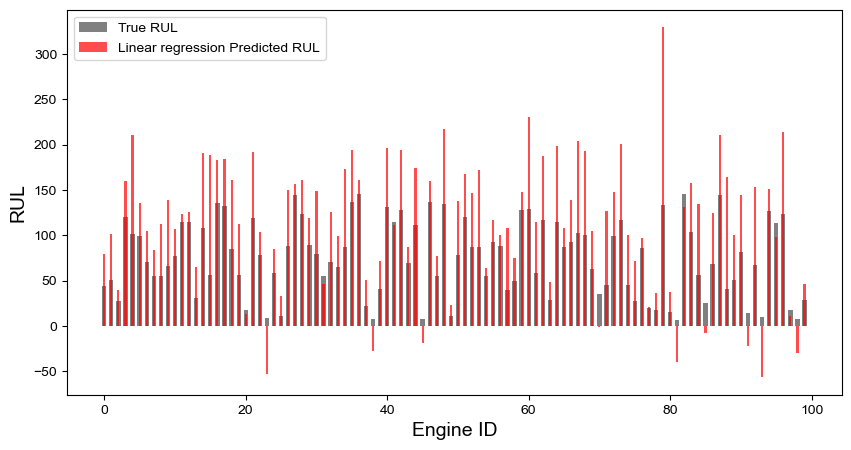

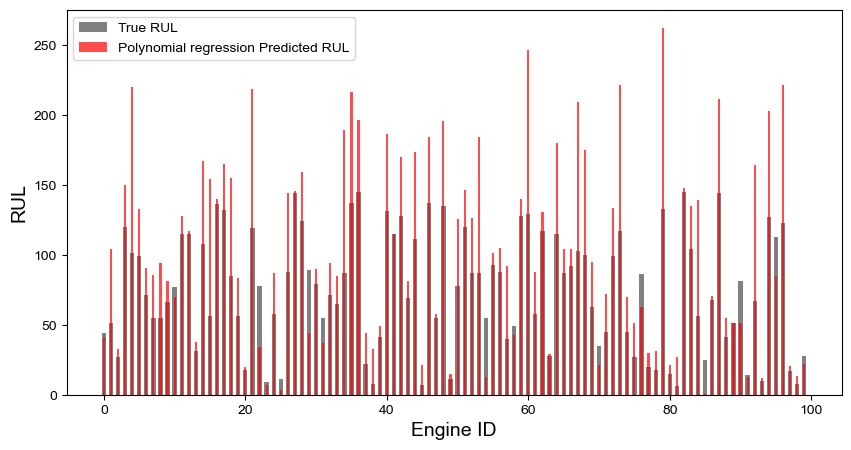

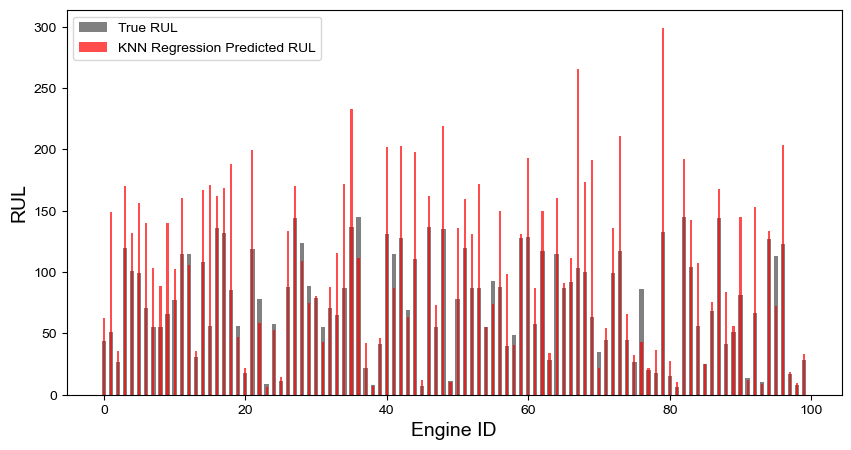

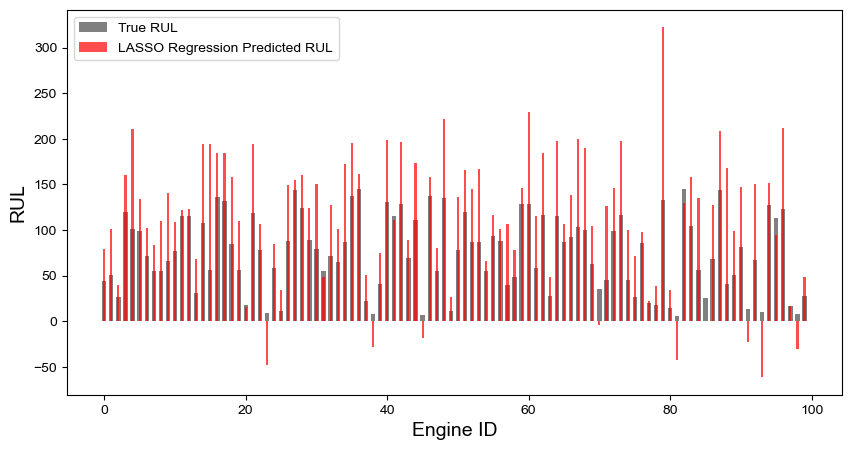

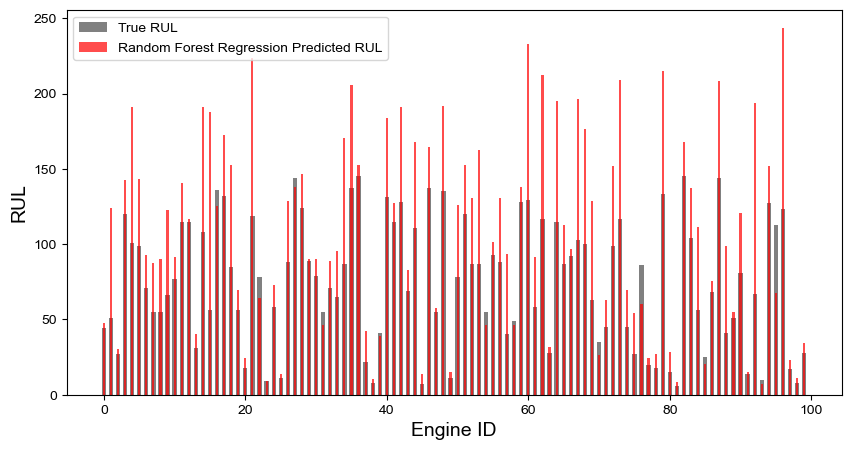

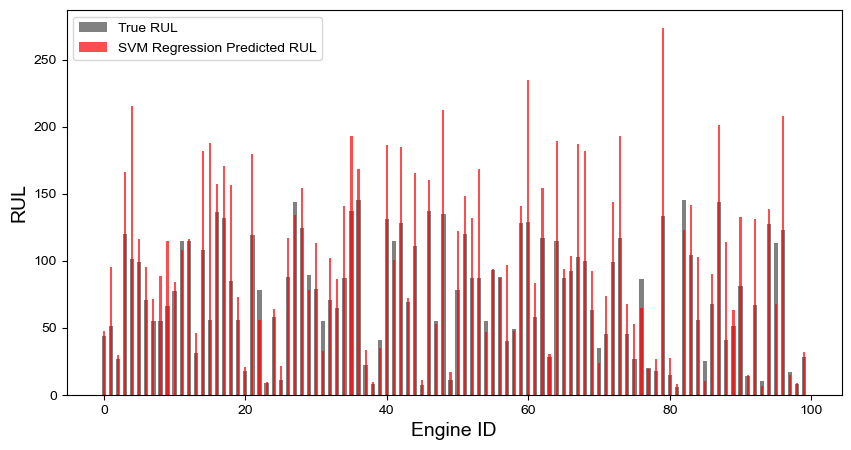

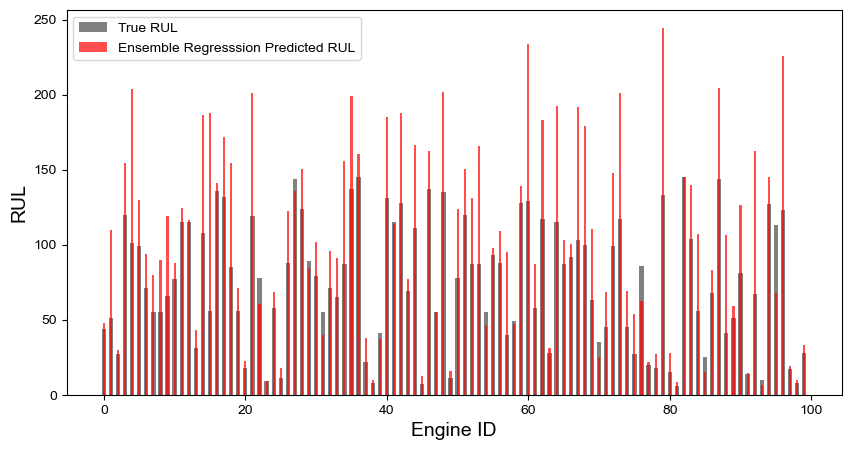

In [48]:
plot_predActual(y_test, y_pred_test_Lin,'Linear regression')
plot_predActual(y_test, y_pred_test_polyReg,'Polynomial regression')
plot_predActual(y_test, y_pred_test_KNN,'KNN Regression')
plot_predActual(y_test, y_pred_test_Lasso,'LASSO Regression')
plot_predActual(y_test, y_pred_test_rf, 'Random Forest Regression')
plot_predActual(y_test, y_pred_test_svm, 'SVM Regression')
plot_predActual(y_test, y_pred_test_ensemble,'Ensemble Regresssion')

It is observed that 
- Linear regression and LASSO underperform in trained data sets
- Polynomial Regression, KNN Regression, Random forest Regression, SVM Regression and Ensemble model shows better prediction.

# Scikit-learn barplot of RMSE from all the ML model after scaling

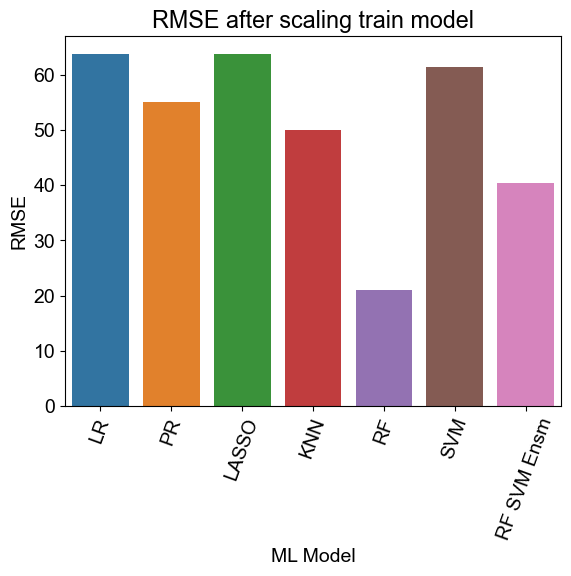

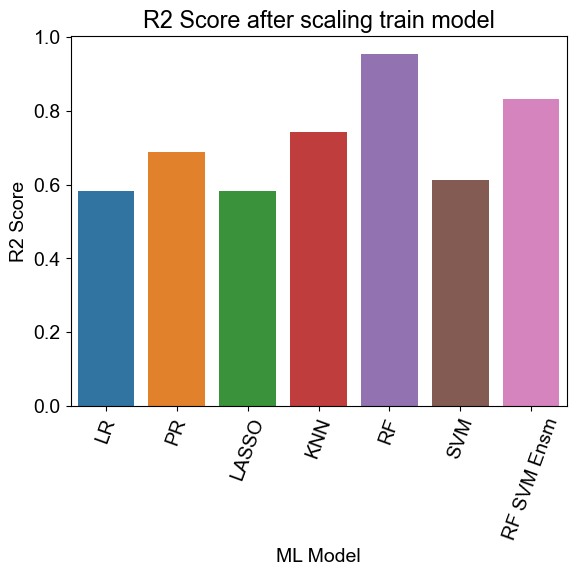

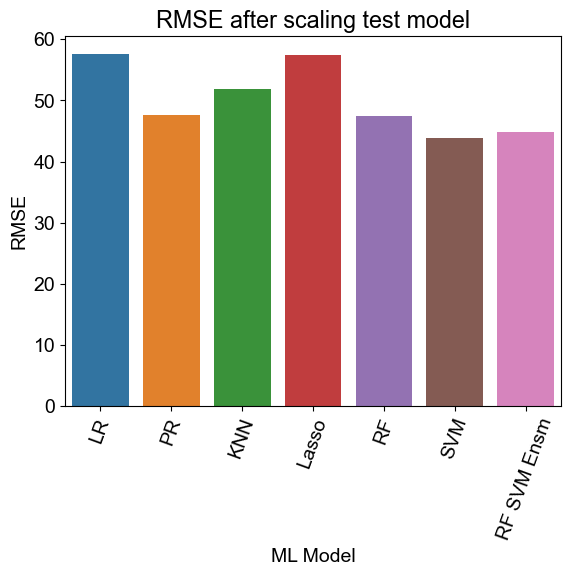

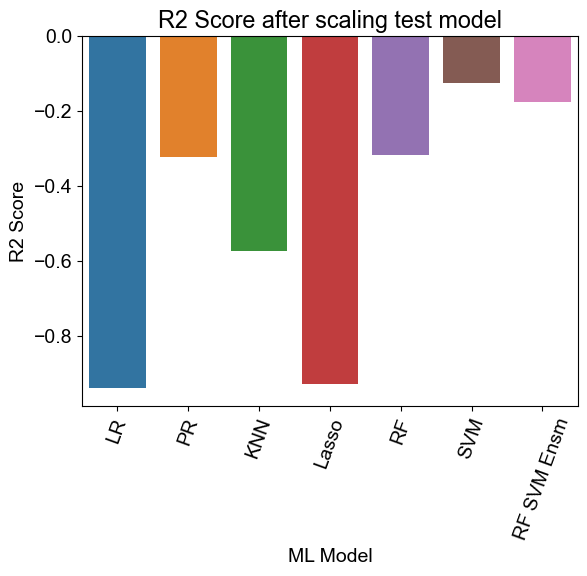

In [49]:
ML_error_plot(ML_error_after_scaled_train, 'after scaling train')
ML_error_plot(ML_error_after_scaled_test, 'after scaling test')

- After scaling the train data sets, similarly, the RMSE values of random forest regression (RF) are low, and R2-score is high, meaning the RF is well-trained compared to other ML models. The RMSE values on the test data set for SVM are lower than all the other models. However, the R2- score in all the models still shows negative, which implies that the model's predictions are worse than a constant function prediction. 

# RUL Distribution

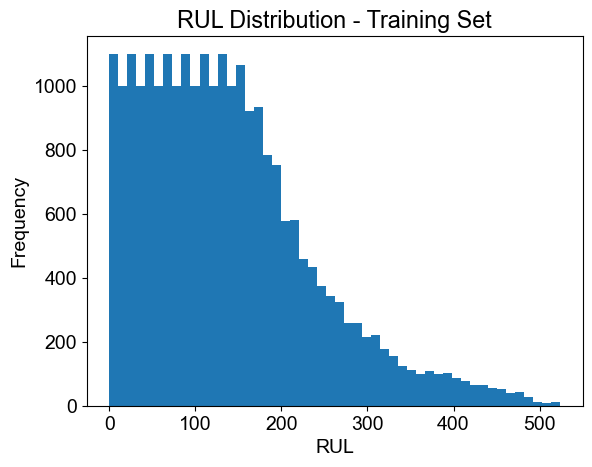

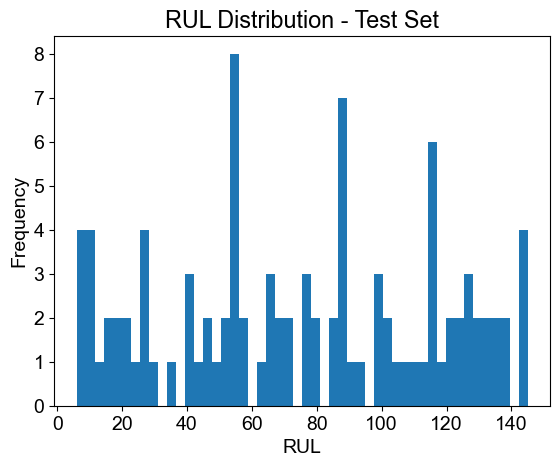

In [50]:
# Plot RUL distribution from training set
plt.hist(y_train, bins=50)
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('RUL Distribution - Training Set')
plt.show()

# Plot RUL distribution from test set
plt.hist(y_test, bins=50)
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('RUL Distribution - Test Set')
plt.show()

- From the RUL distribution, the RUL between 0 to 145 shows more occurrences in the data set. We perform RUL clipping where all the train and test data sets have been restricted corresponding to RUL lies between 0 to 145. In the next section, training and testing of all the ML models have been done for RUL-clipped data sets. 

# RUL Clipping



In [51]:
# Clip RUL values in training set
y_train_clipped = np.clip(y_train, None, 145)

# Define error dictornay after RUL clipping
ML_error_clipped_train = {}
ML_error_clipped_test = {}

In [52]:
# Train the models after RUL clipping
pipeLinear.fit(X_train_scaled, y_train_clipped)
polynomial_regression.fit(X_train_scaled, y_train_clipped)
pipeLasso.fit(X_train_scaled, y_train_clipped)
pipeKNN.fit(X_train_scaled, y_train_clipped)
rf_regressor.fit(X_train_scaled, y_train_clipped)
svm_regressor.fit(X_train_scaled, y_train_clipped)
ensemble_regressor.fit(X_train_scaled, y_train_clipped)

# Evaluate the models on training set after clipping
y_pred_train_Liner = pipeLinear.predict(X_train_scaled)                                      
y_pred_train_Poly = polynomial_regression.predict(X_train_scaled)
y_pred_train_KNN = pipeKNN.predict(X_train_scaled)
y_pred_train_Lasso = pipeLasso.predict(X_train_scaled)
y_pred_train_rf = rf_regressor.predict(X_train_scaled)
y_pred_train_svm = svm_regressor.predict(X_train_scaled)
y_pred_train_ensemble = ensemble_regressor.predict(X_train_scaled)

# Create the ensemble model with RF and SVM
print("Linear - Training Set:")
ML_error_clipped_train['LR'] = ML_error(y_train_clipped, y_pred_train_Liner, 'train')
print("Poly - Training Set:")
ML_error_clipped_train['PR'] = ML_error(y_train_clipped, y_pred_train_Poly, 'train')
print("KNN - Training Set:")
ML_error_clipped_train['KNN'] = ML_error(y_train_clipped, y_pred_train_KNN, 'train')
print("Lasso - Training Set:")
ML_error_clipped_train['LASSO'] = ML_error(y_train_clipped, y_pred_train_Lasso, 'train')
print("RF - Training Set:")
ML_error_clipped_train['RF'] = ML_error(y_train_clipped, y_pred_train_rf, 'train')
print("SVM - Training Set:")
ML_error_clipped_train['SVM'] = ML_error(y_train_clipped, y_pred_train_svm, 'train')
print("Ensemble - Training Set:")
ML_error_clipped_train['RF SVM Ensm'] = ML_error(y_train_clipped, y_pred_train_ensemble, 'train')

y_pred_test_Linear = pipeLinear.predict(X_test_scaled)
y_pred_test_polyReg = polynomial_regression.predict(X_test_scaled)
y_pred_test_KNN = pipeKNN.predict(X_test_scaled)
y_pred_test_Lasso = pipeLasso.predict(X_test_scaled)
y_pred_test_rf = rf_regressor.predict(X_test_scaled)
y_pred_test_svm = svm_regressor.predict(X_test_scaled)
y_pred_test_ensemble = ensemble_regressor.predict(X_test_scaled)


print("Linear - Test Set:")
ML_error_clipped_test['LR'] = ML_error(y_test, y_pred_test_Linear)
print("PolyReg - Test Set:")
ML_error_clipped_test['PR'] = ML_error(y_test, y_pred_test_polyReg)
print("KNN - Test Set:")
ML_error_clipped_test['KNN'] = ML_error(y_test, y_pred_test_KNN)
print("Lasso - Test Set:")
ML_error_clipped_test['LASSO'] = ML_error(y_test, y_pred_test_Lasso)
print("Random Forest - Test Set:")
ML_error_clipped_test['RF'] = ML_error(y_test, y_pred_test_rf)
print("SVM - Test Set:")
ML_error_clipped_test['SVM'] =ML_error(y_test, y_pred_test_svm)
print("Ensemble - Test Set:")
ML_error_clipped_test['RF SVM Ensm'] = ML_error(y_test, y_pred_test_ensemble)

Linear - Training Set:
train set RMSE:24.052224805251722, R2:0.7506406026105983
Poly - Training Set:
train set RMSE:19.781192338684928, R2:0.8313368672920531
KNN - Training Set:
train set RMSE:17.94367675808683, R2:0.8612164138679012
Lasso - Training Set:
train set RMSE:24.274761014726423, R2:0.7460050061119847
RF - Training Set:
train set RMSE:7.515026449750731, R2:0.9756568789904099
SVM - Training Set:
train set RMSE:21.394014521088298, R2:0.8027123936965219
Ensemble - Training Set:
train set RMSE:14.19238105319847, R2:0.9131788053875589
Linear - Test Set:
test set RMSE:25.2204547738142, R2:0.6288093896735105
PolyReg - Test Set:
test set RMSE:23.439621527157428, R2:0.6793787191716527
KNN - Test Set:
test set RMSE:27.32702691475968, R2:0.5642113410989837
Lasso - Test Set:
test set RMSE:25.620864322163133, R2:0.6169295004762543
Random Forest - Test Set:
test set RMSE:24.092945710311138, R2:0.6612565091127579
SVM - Test Set:
test set RMSE:26.004677706078184, R2:0.6053663575410004
Ensemb

# Scikit-learn barplot of RMSE from all the ML model after scaling and RUL Clipping

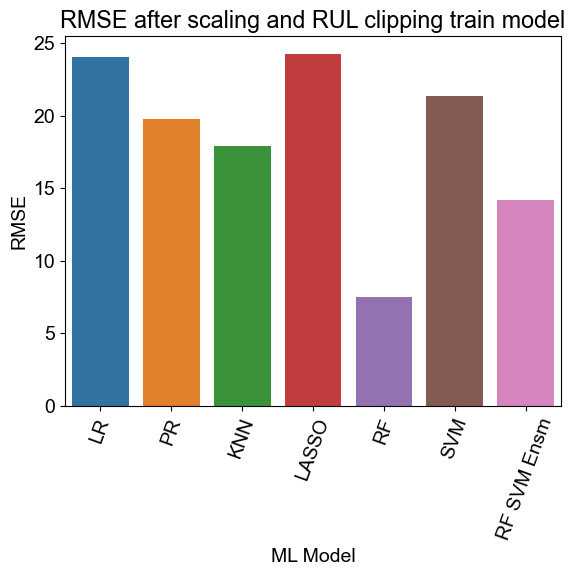

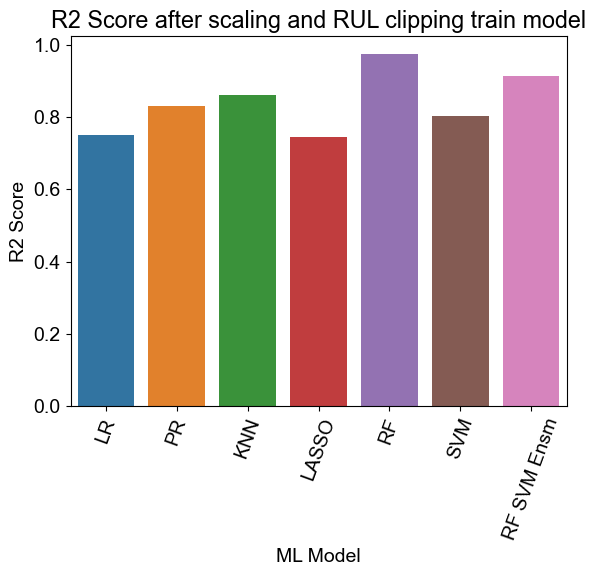

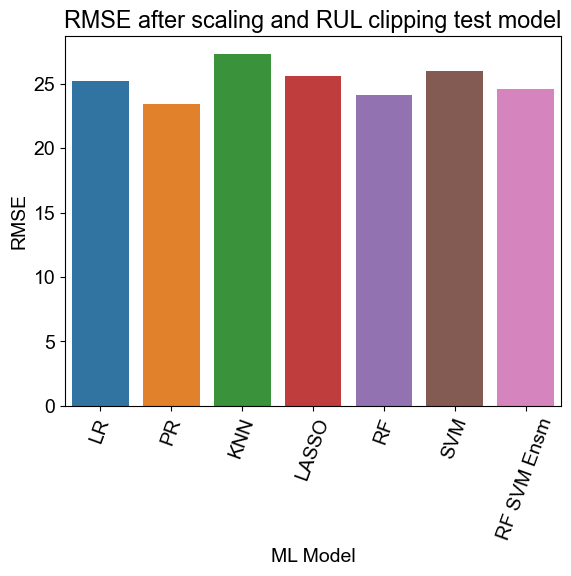

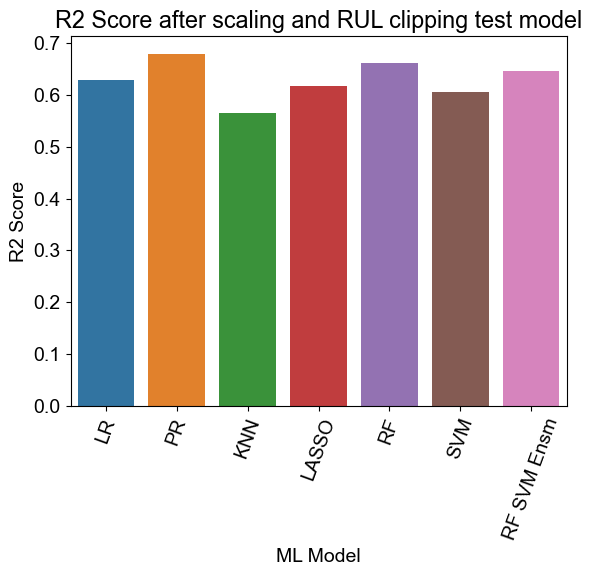

In [53]:
ML_error_plot(ML_error_clipped_train, 'after scaling and RUL clipping train')
ML_error_plot(ML_error_clipped_test, 'after scaling and RUL clipping test')

- It is observed that RMSe values for the RF model after RUL clipped are very low and high R2-score which means that the random forest model has trained better than other ML models.
- However, in the test sets after RUL clipping, the Polynomial regression (PR) model up to polynomial degree 4 performs better than the RF model. PR has a lower RMSE and high R2-score than all the other ML models.

# Actual vs Predicted RUL (AFTER CLIPPING THE RUL)

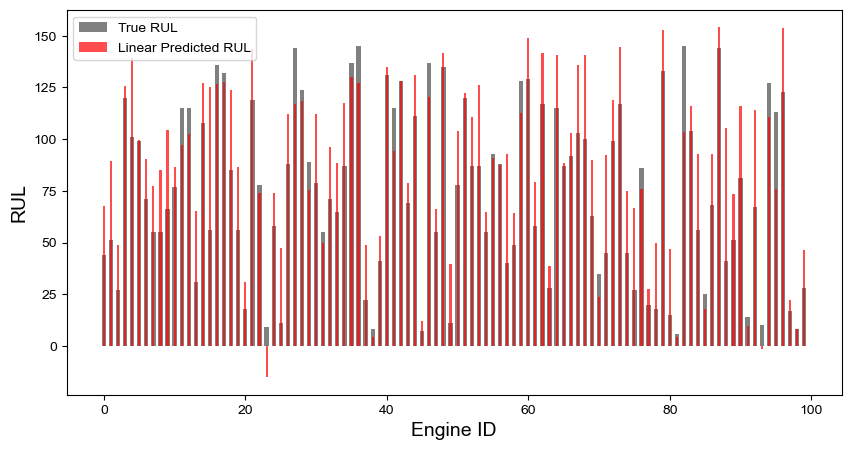

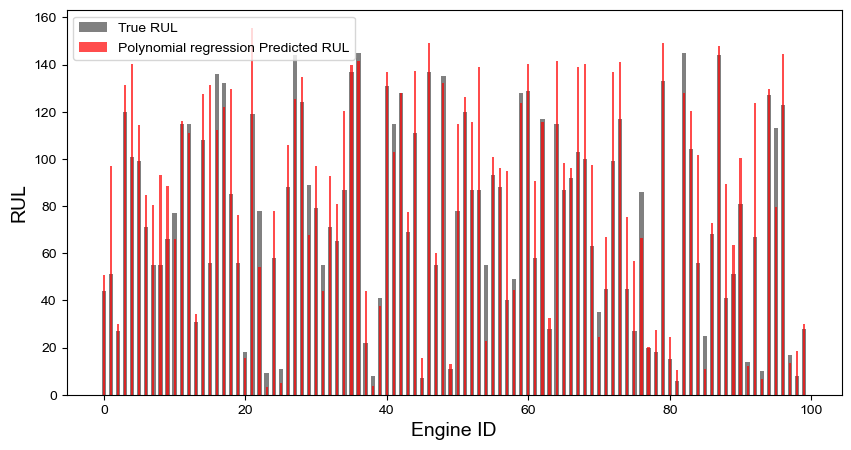

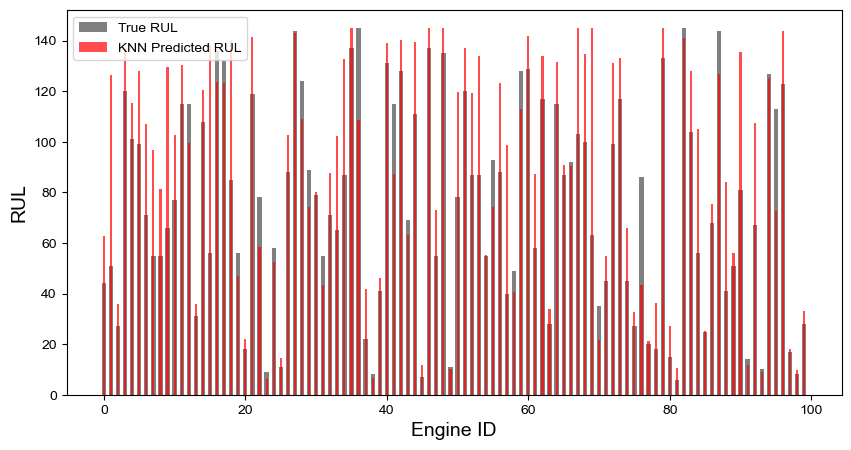

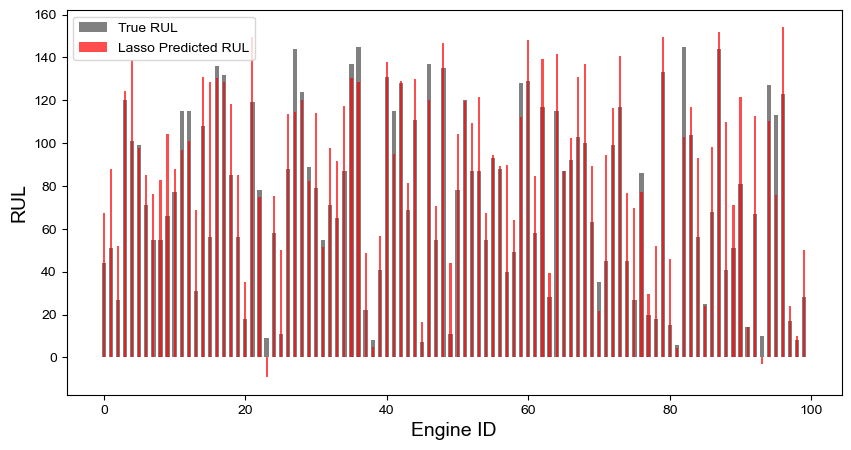

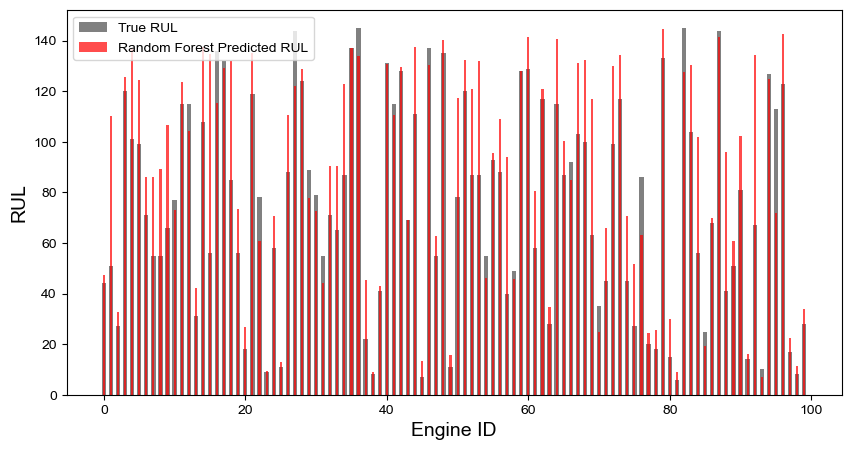

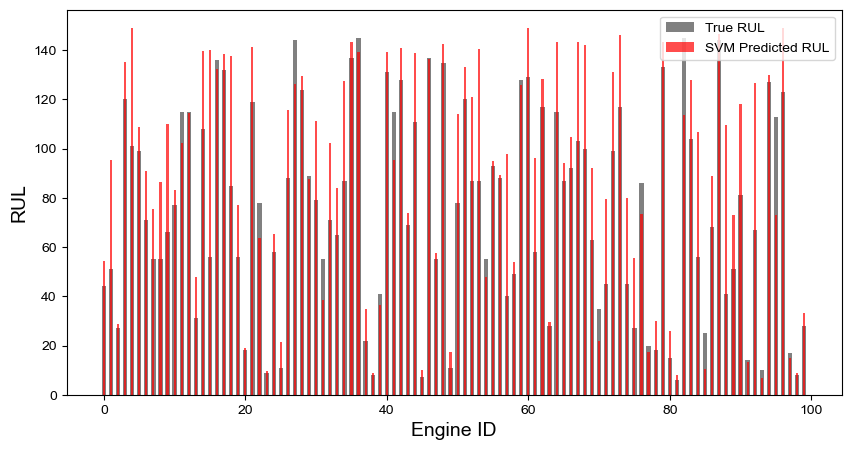

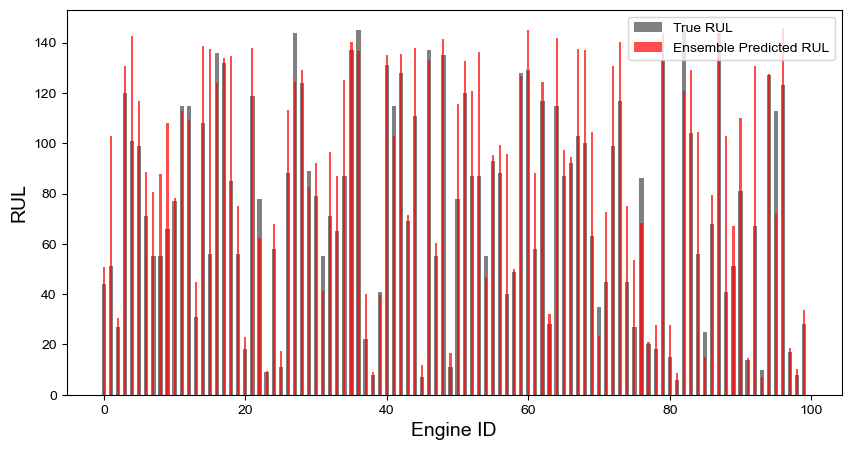

In [54]:
plot_predActual(y_test, y_pred_test_Linear,'Linear')
plot_predActual(y_test, y_pred_test_polyReg,'Polynomial regression')
plot_predActual(y_test, y_pred_test_KNN,'KNN')
plot_predActual(y_test, y_pred_test_Lasso,'Lasso')
plot_predActual(y_test, y_pred_test_rf, 'Random Forest')
plot_predActual(y_test, y_pred_test_svm, 'SVM')
plot_predActual(y_test, y_pred_test_ensemble,'Ensemble')

Since the purpose of RUL prediction based on train data sets is to predict the remaining useable life of an aircraft engine, it is always necessary that the prediction should not exceed the actual remaining life of the engine. In conclusion, it is observed that polynomial regression with degree 4 shows a better prediction of RUL for the dataset of FD003.txt.